In [365]:
from astropy.io import fits
import numpy as np
import astropy
from astropy.table import Table
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [366]:
path = '/home/suman/tifr/'
file = path + '202307011_1506_Am241_on_det1_30000pkts.fits'

hdul = fits.open(file)[1]

In [367]:
data = hdul.data
tab = Table(data)
tab

time,detid,pixid,pha
uint32,int16,int16,int16
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
...,...,...,...
729060084,1,181,599
729060133,1,0,346


In [368]:
data1 = data[data['detid']==1]

In [369]:
data1 = Table(data1)
data1

time,detid,pixid,pha
uint32,int16,int16,int16
3883520021,1,224,339
3883520048,1,252,389
3883520075,1,247,371
3883520102,1,91,1032
3883520129,1,0,550
3883520156,1,253,426
...,...,...,...
729060084,1,181,599
729060133,1,0,346


In [370]:
unique_pixels = np.unique(data1['pixid'])
len(unique_pixels)

224

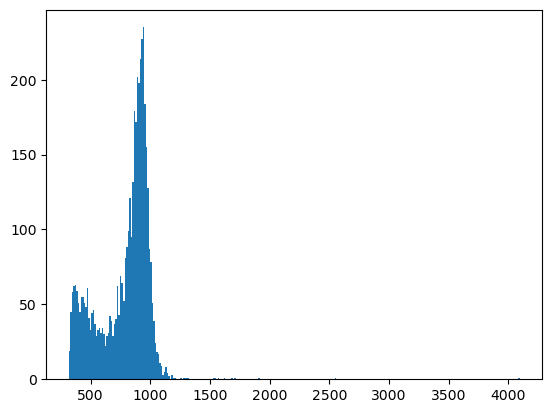

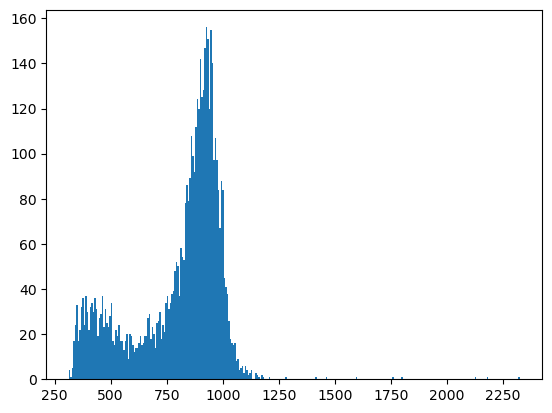

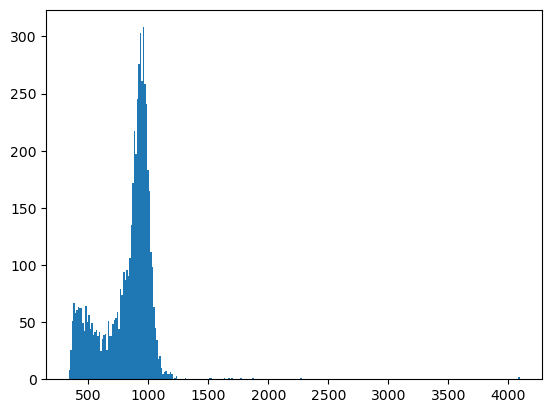

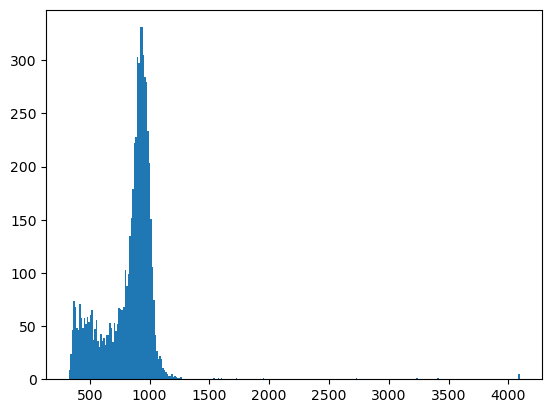

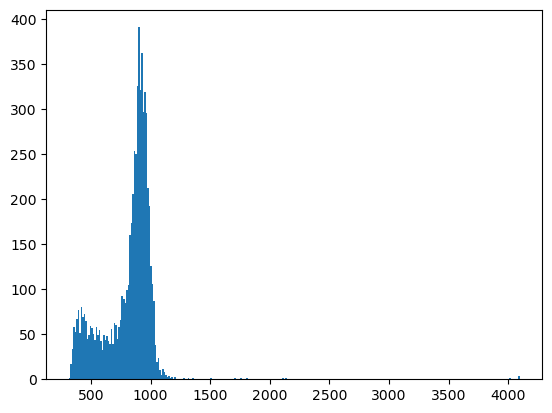

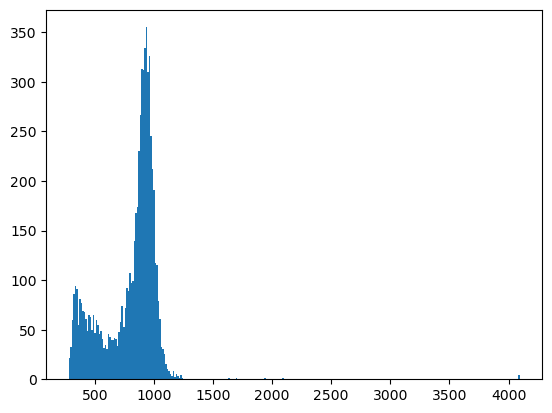

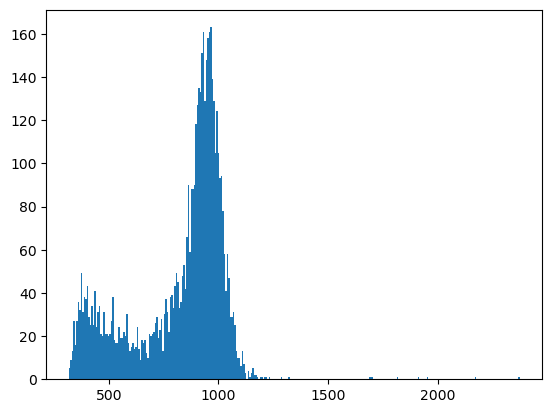

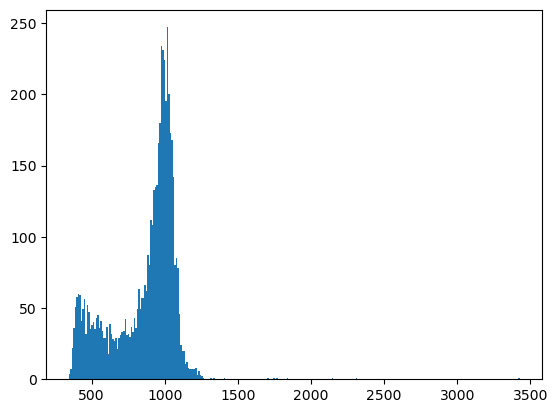

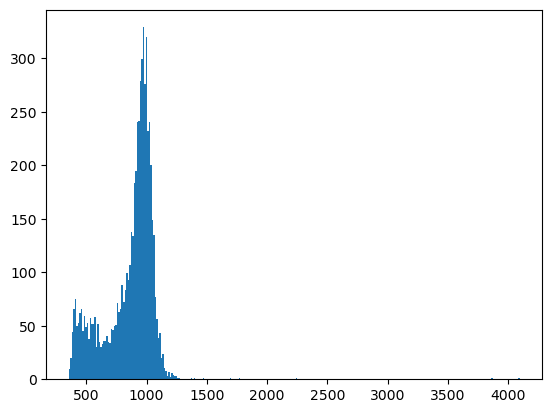

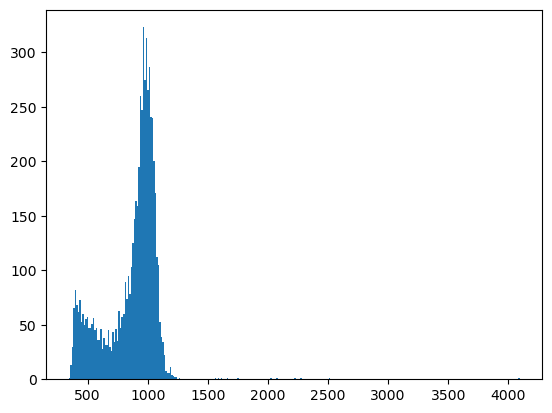

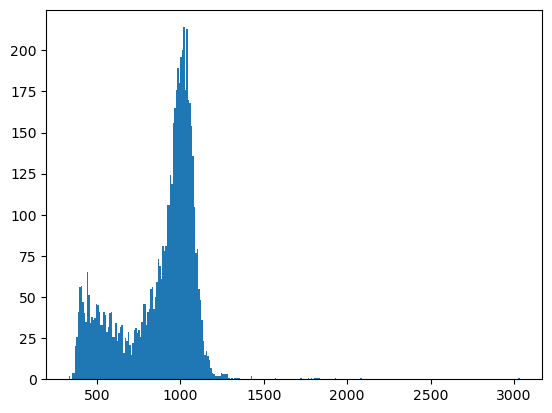

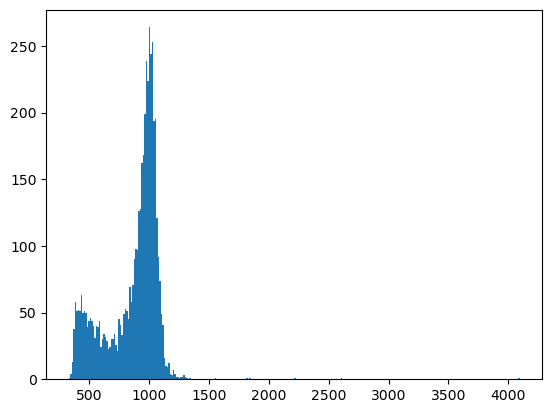

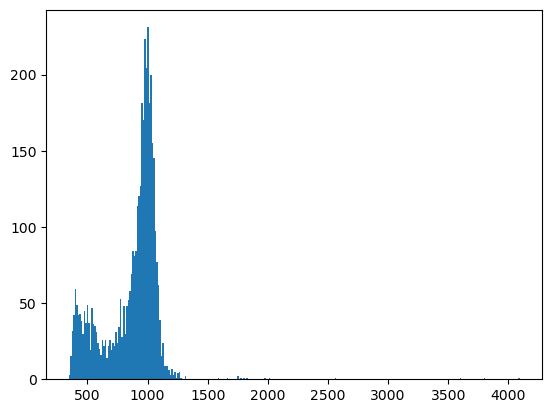

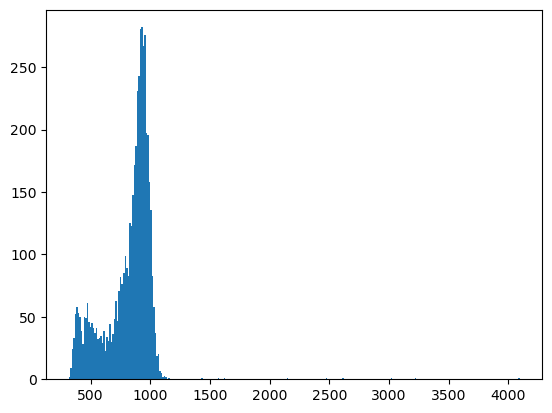

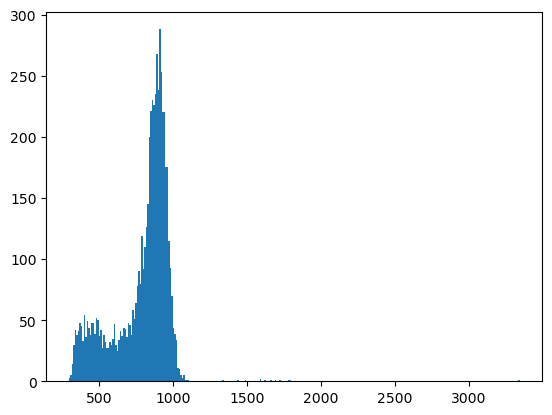

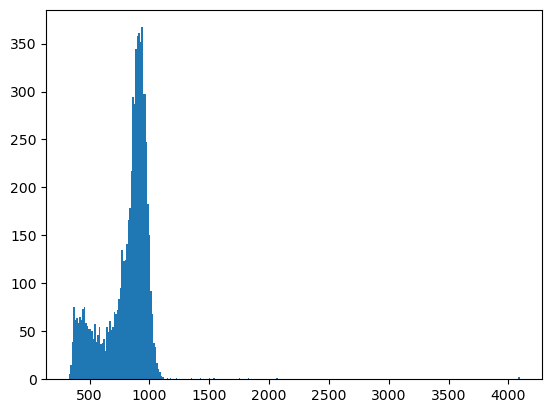

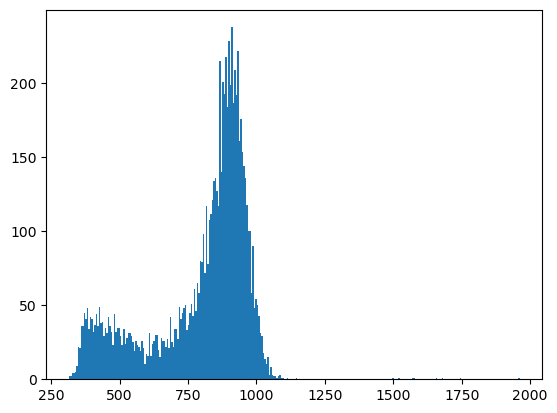

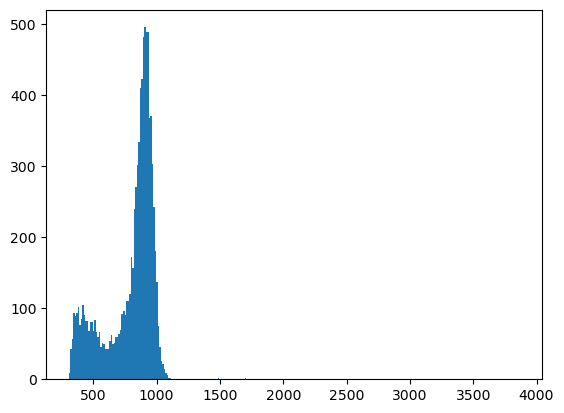

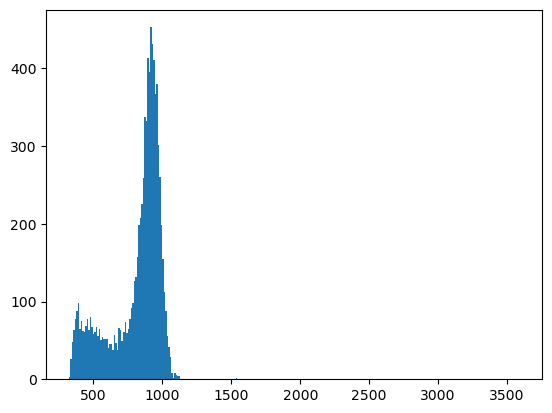

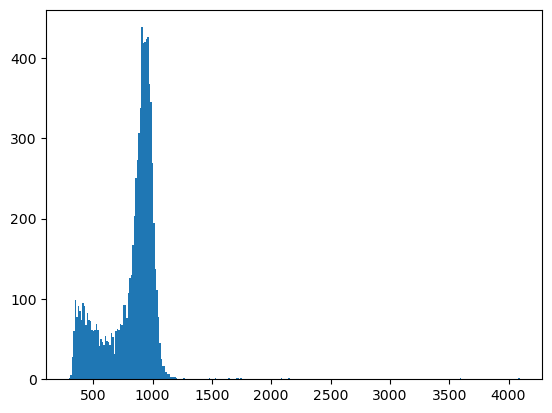

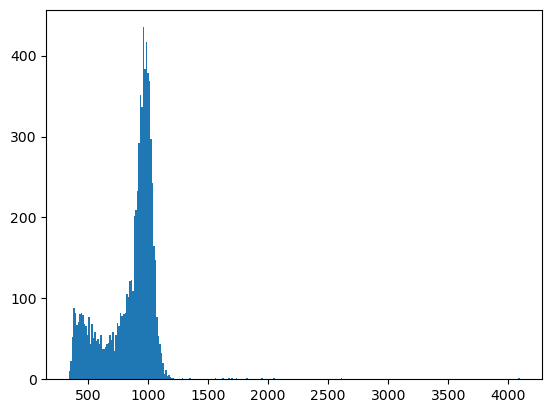

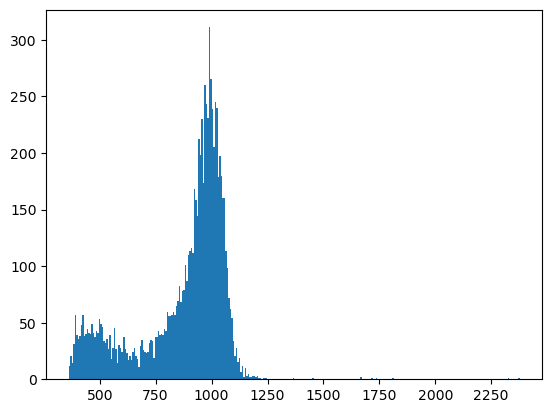

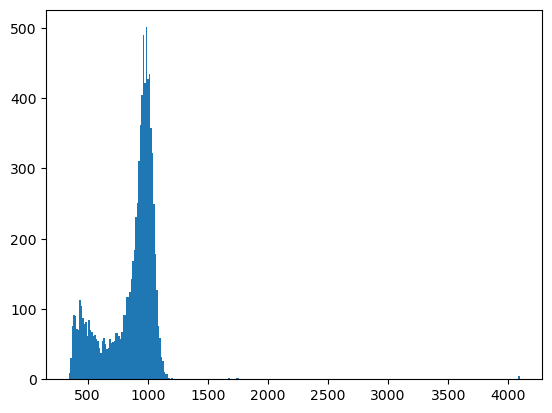

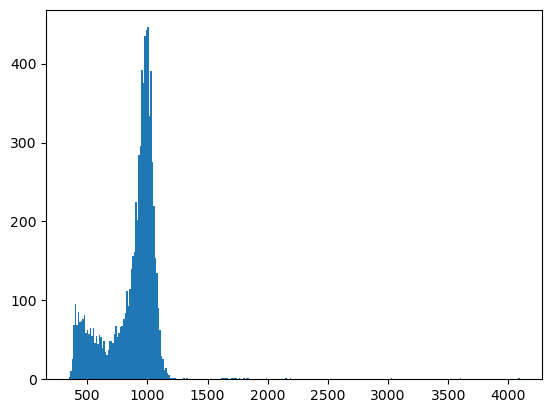

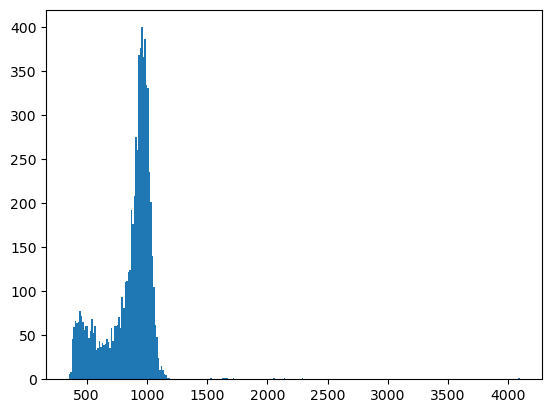

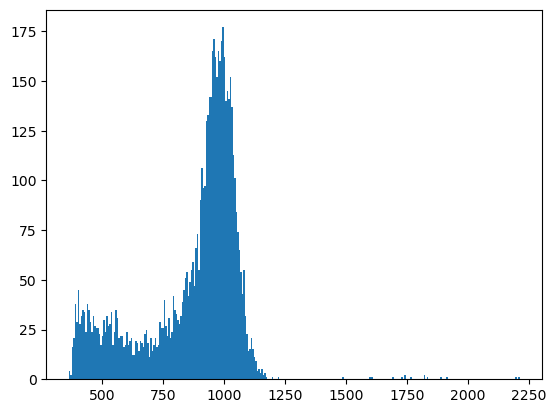

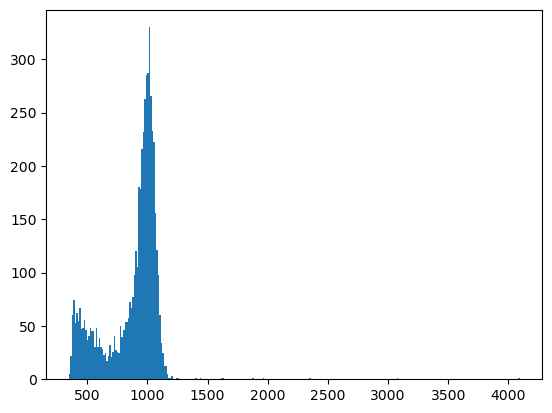

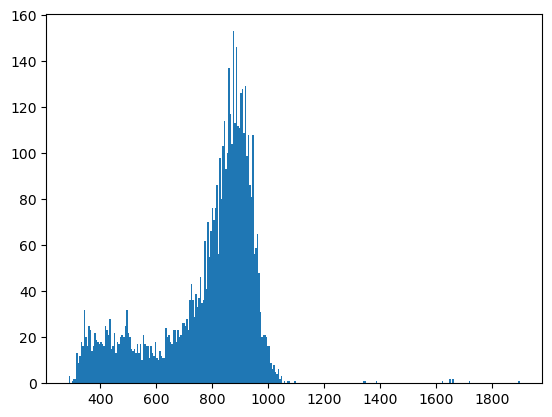

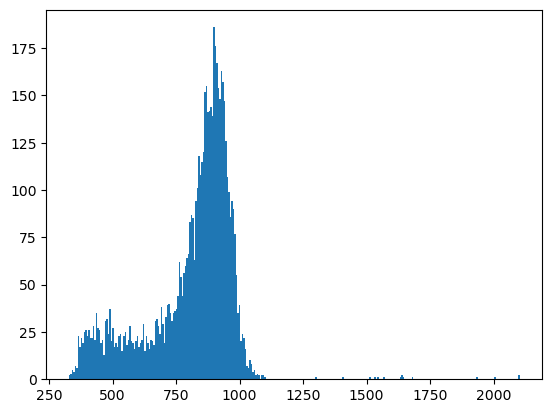

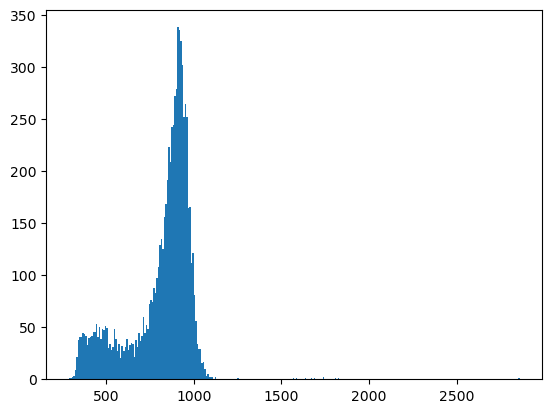

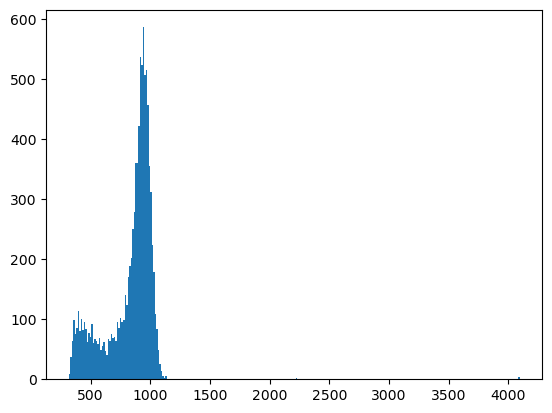

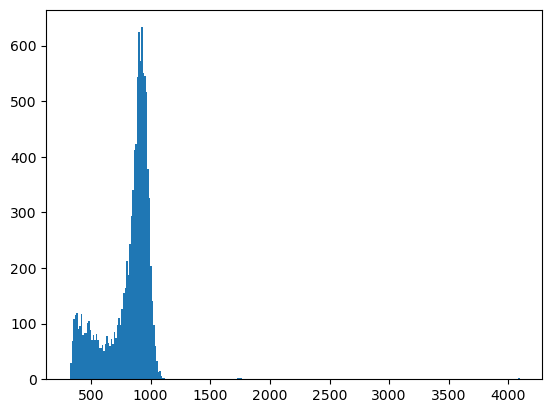

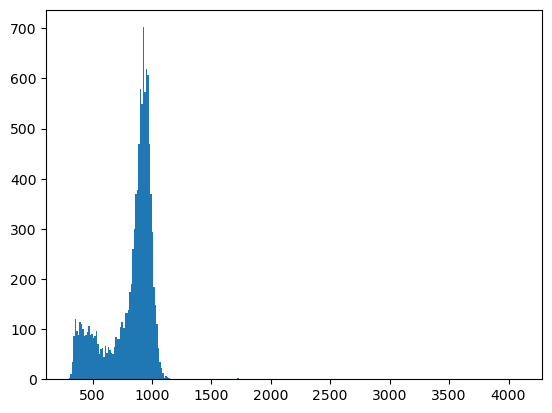

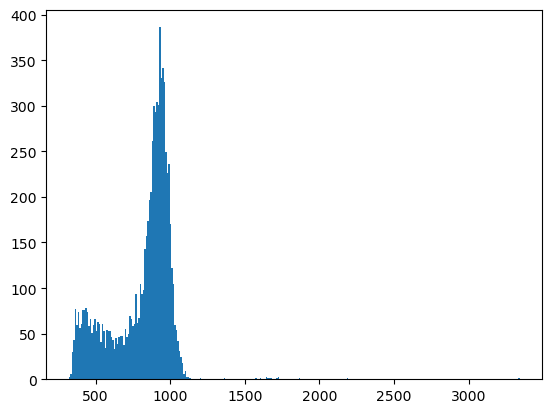

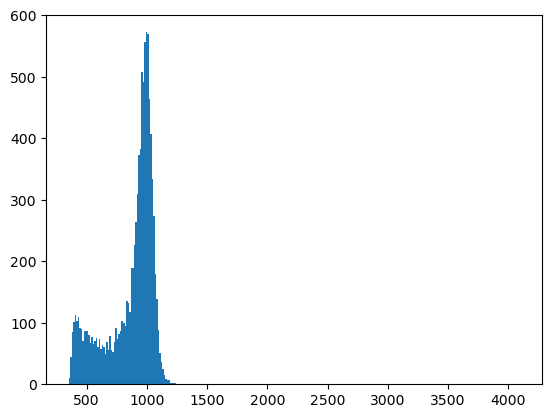

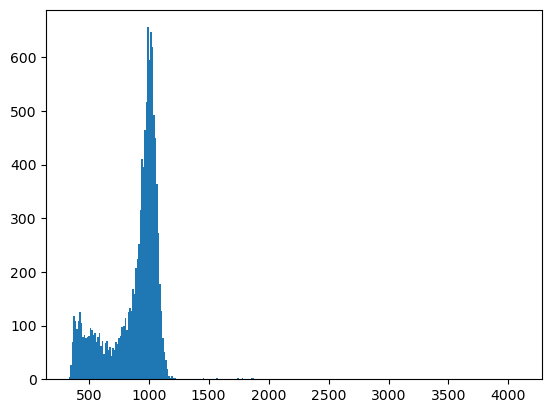

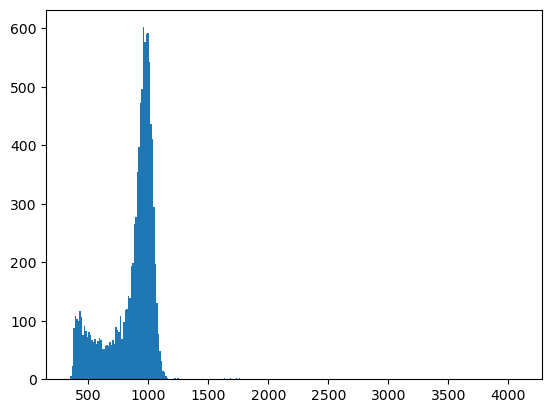

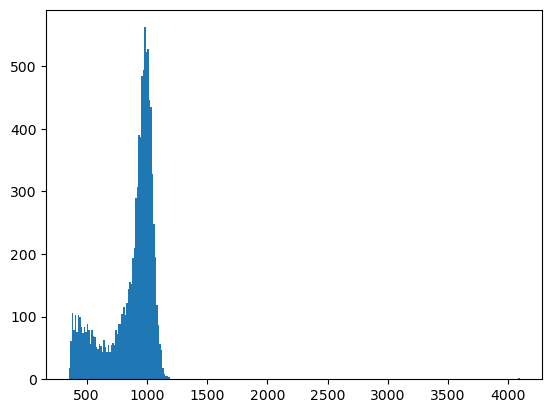

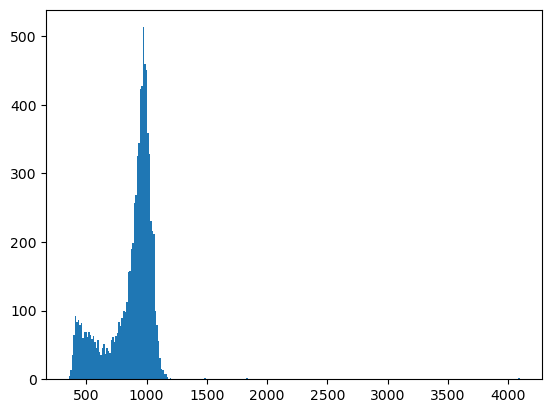

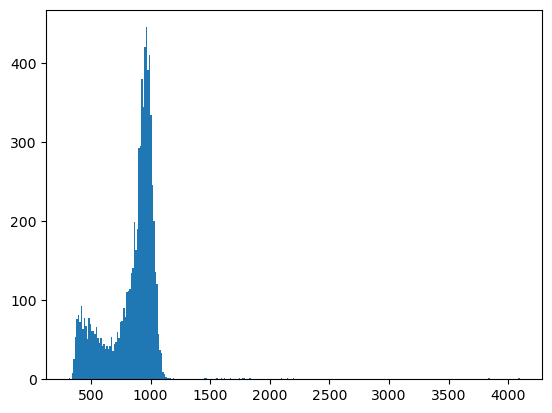

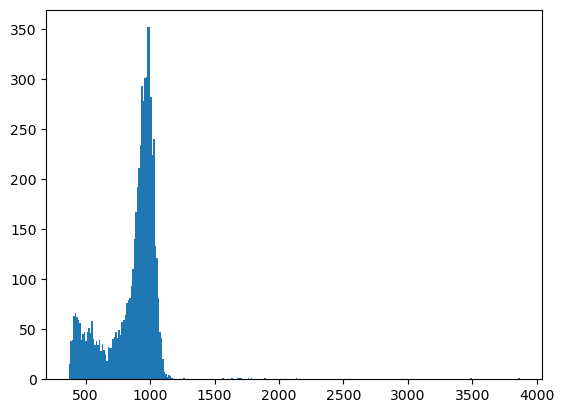

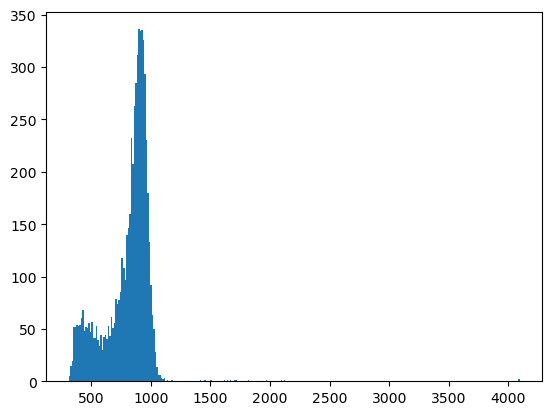

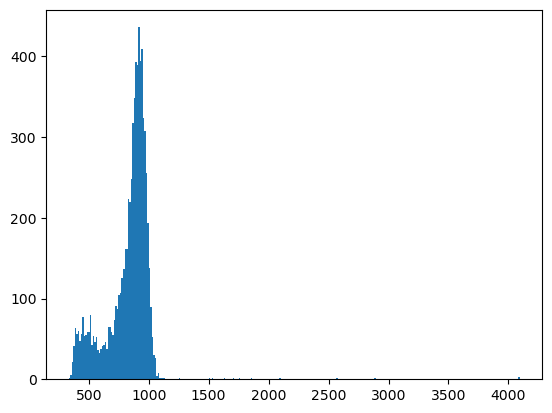

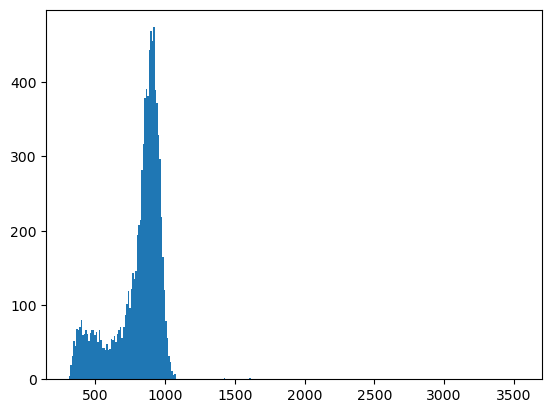

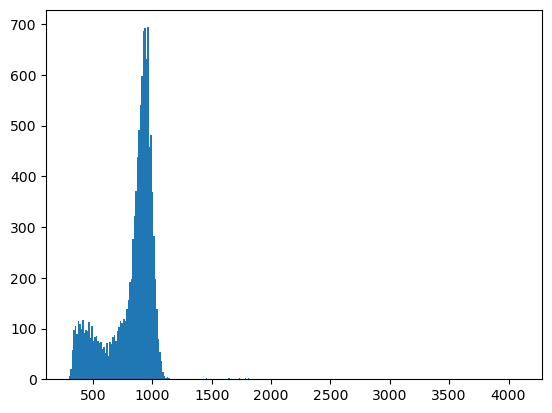

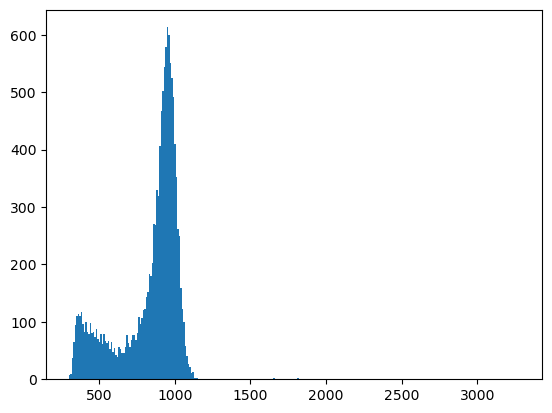

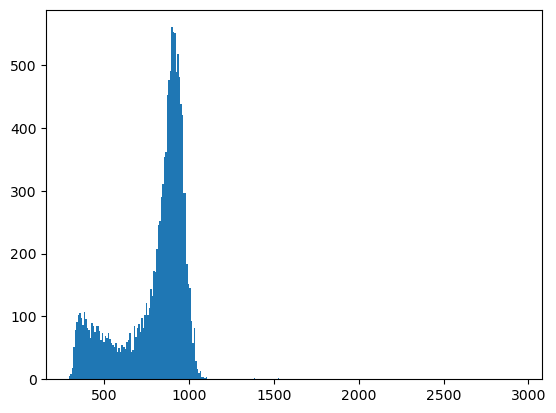

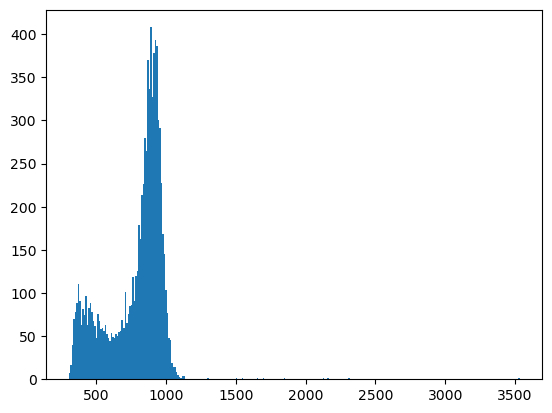

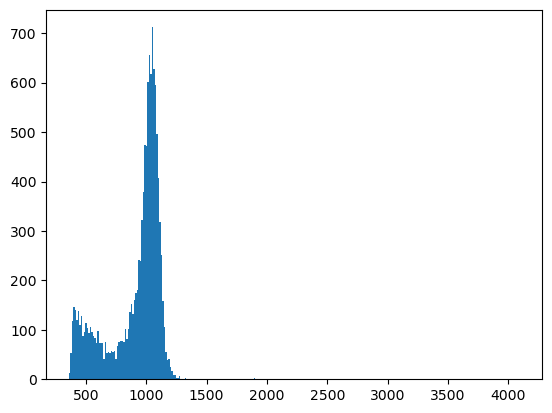

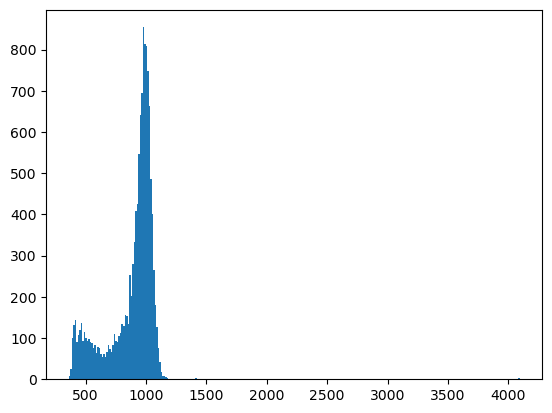

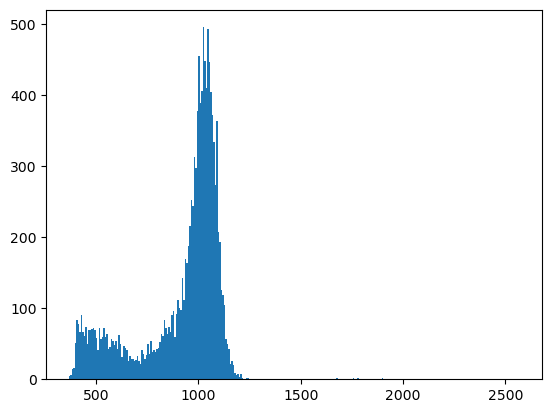

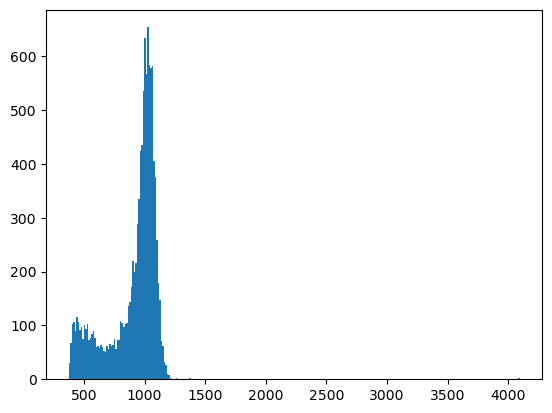

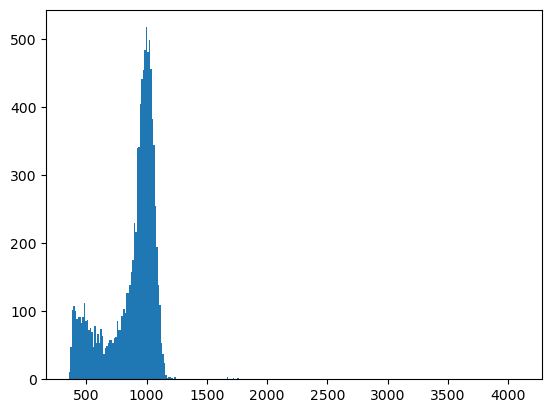

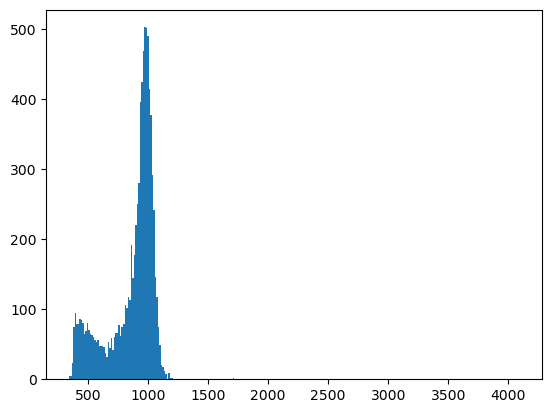

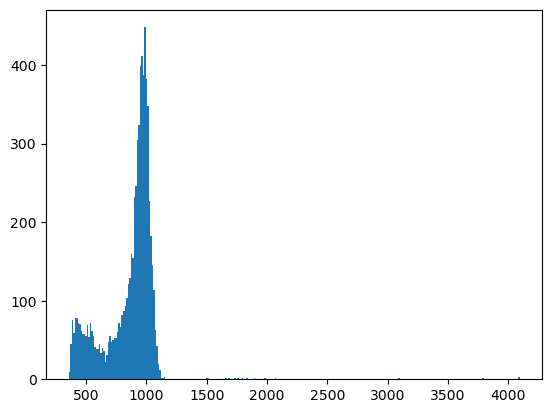

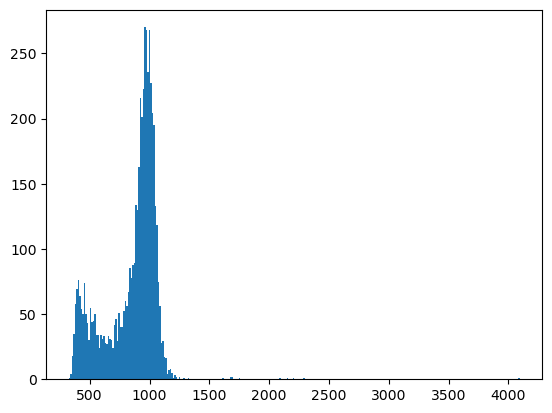

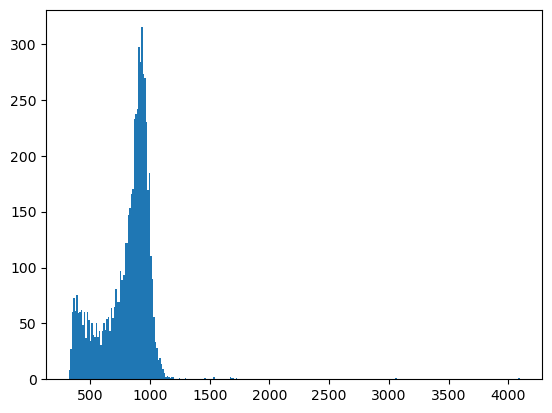

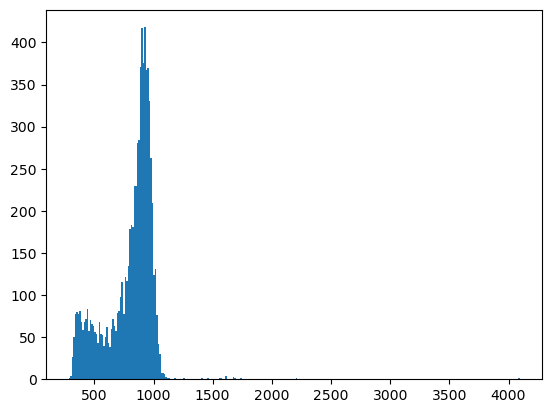

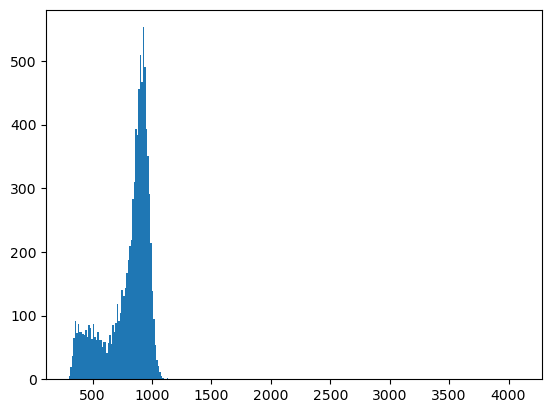

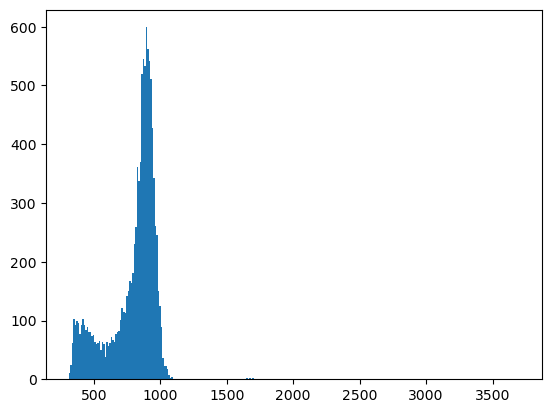

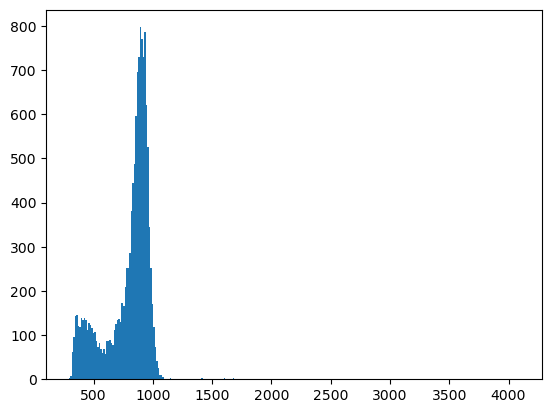

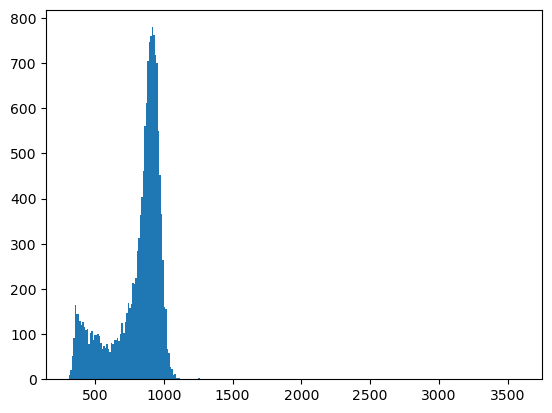

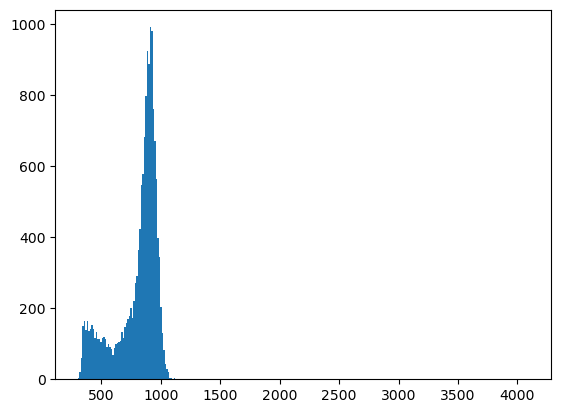

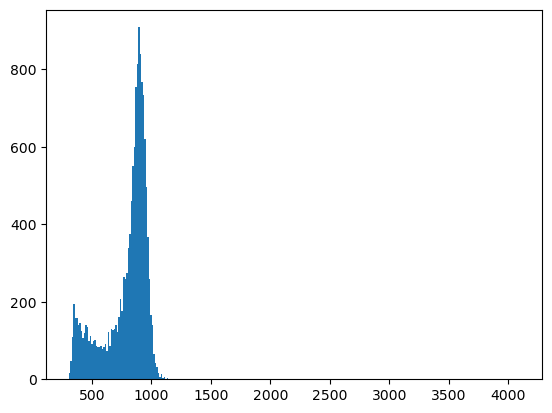

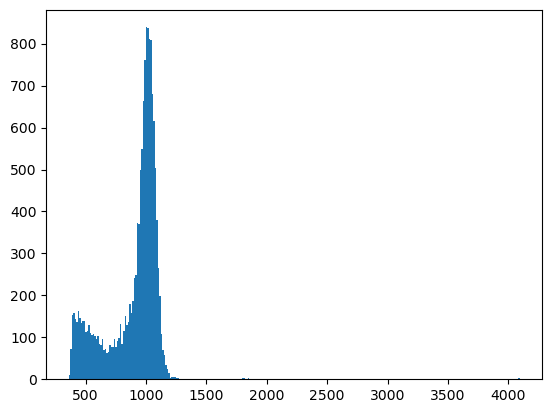

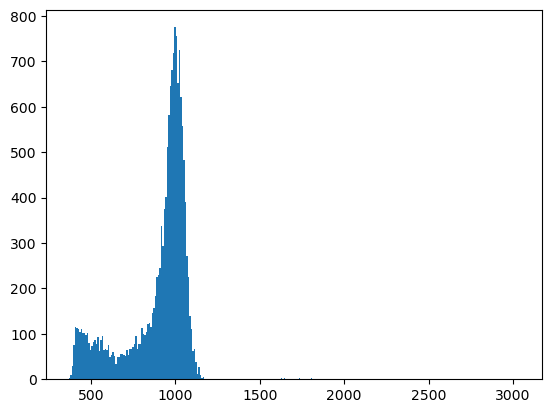

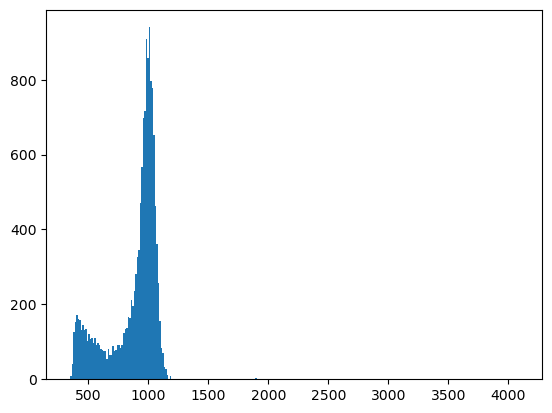

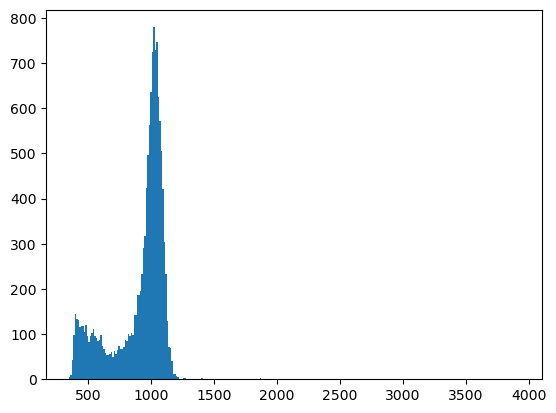

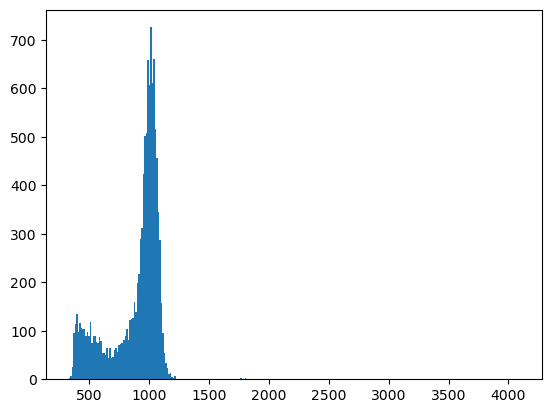

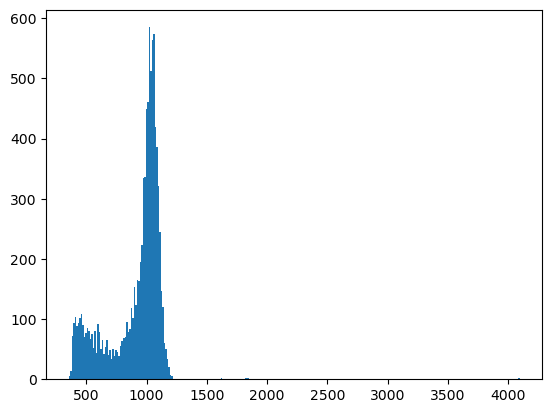

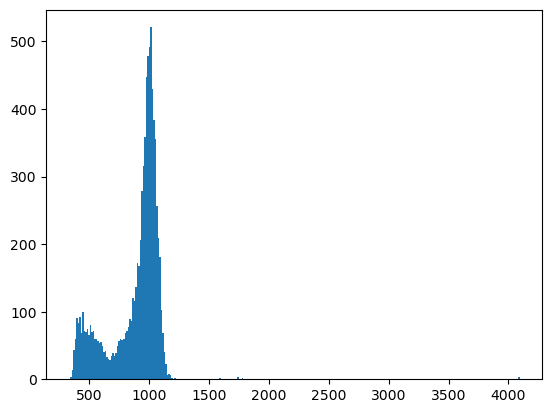

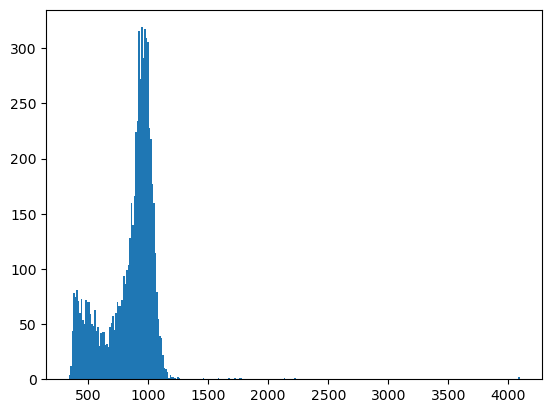

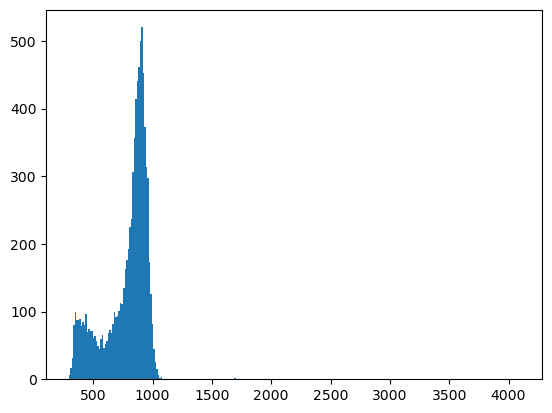

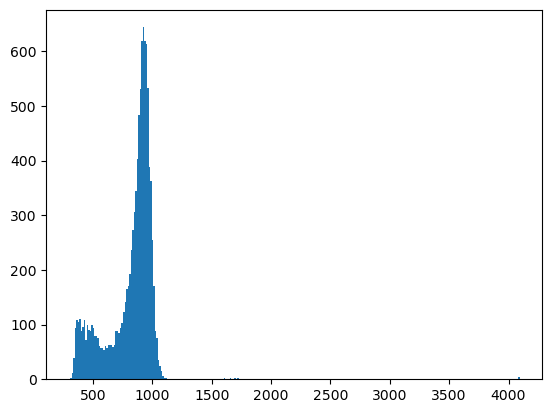

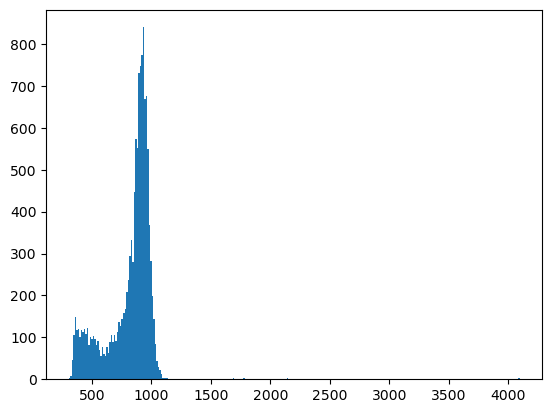

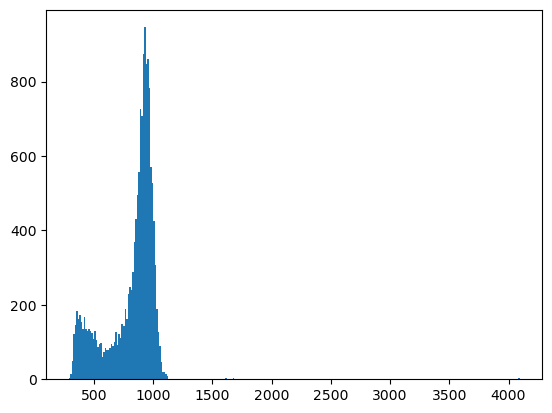

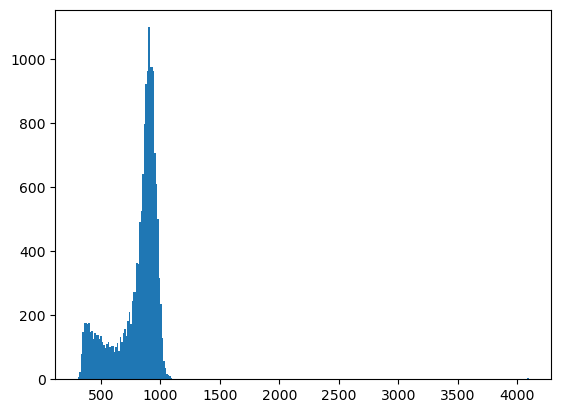

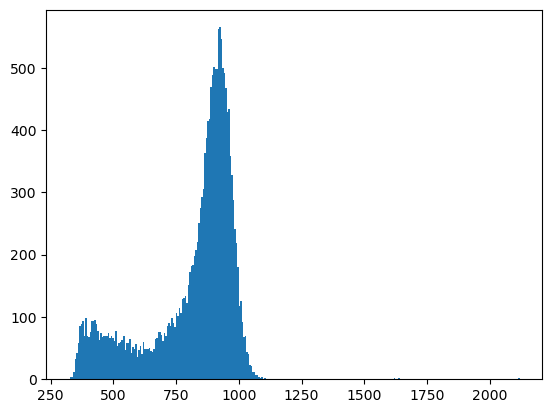

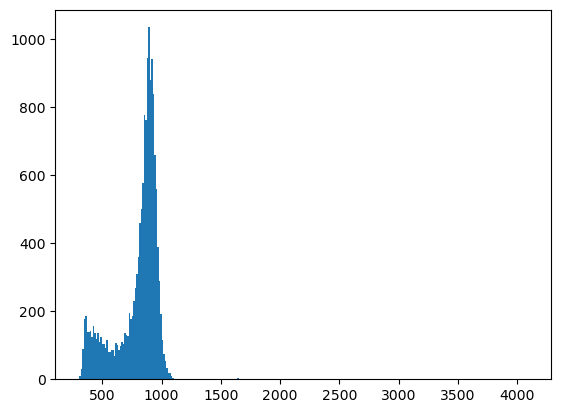

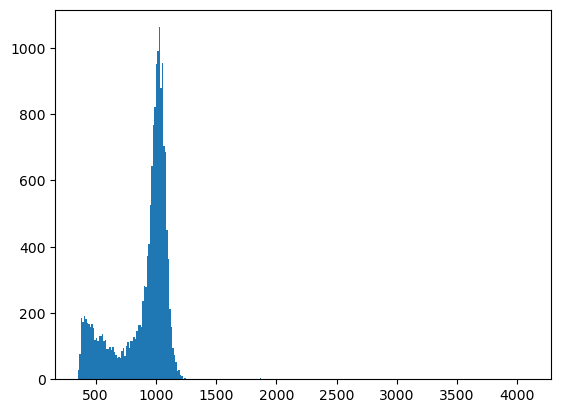

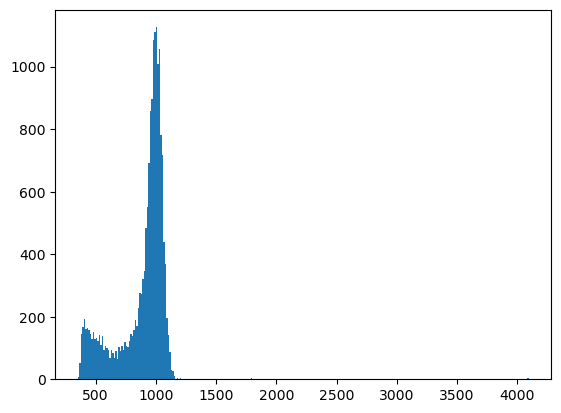

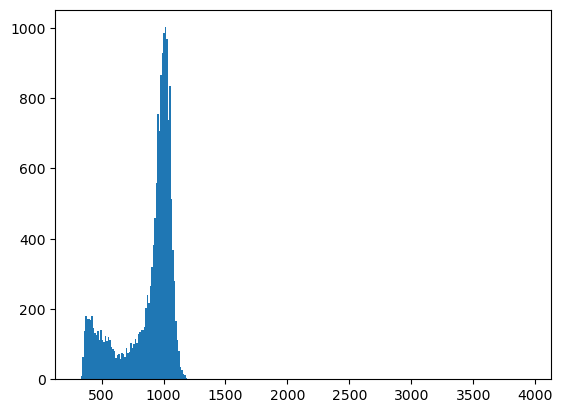

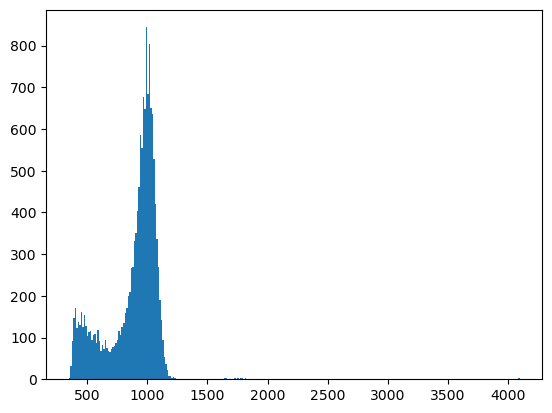

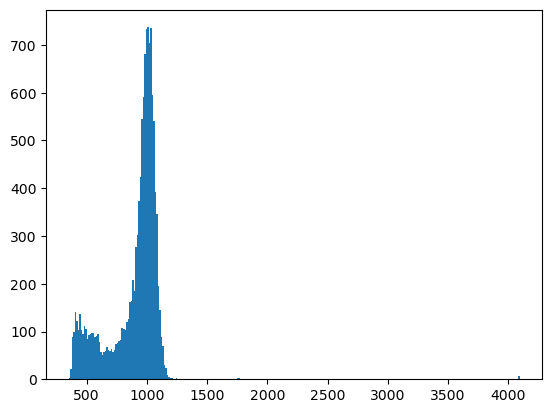

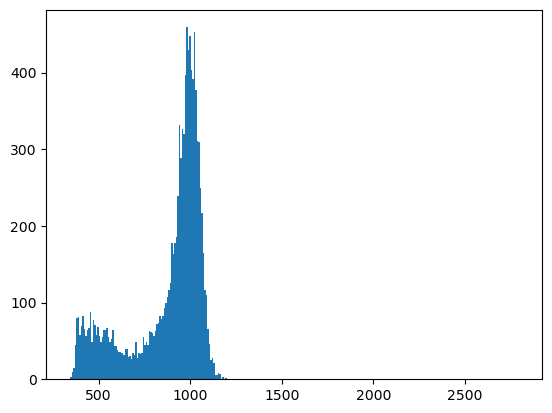

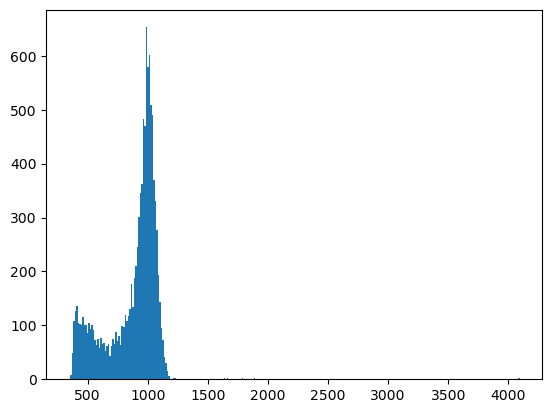

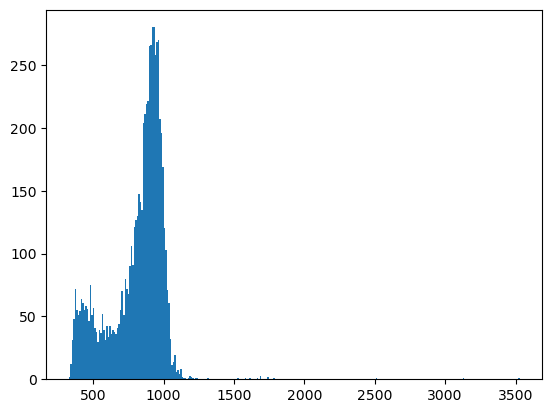

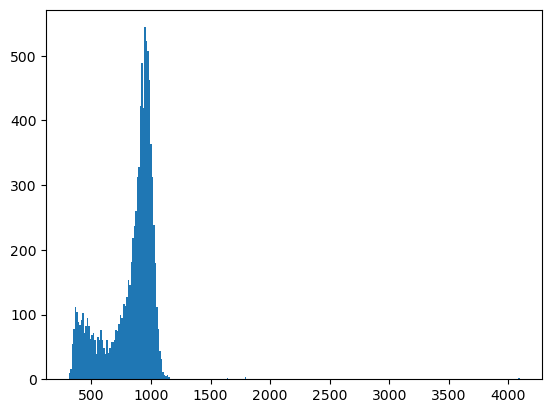

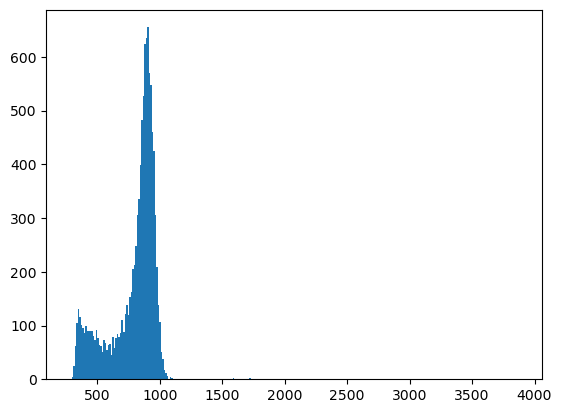

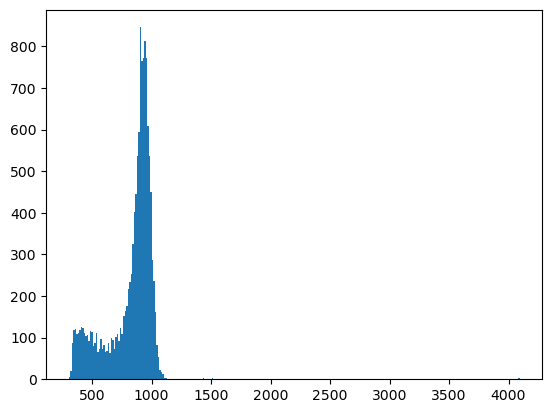

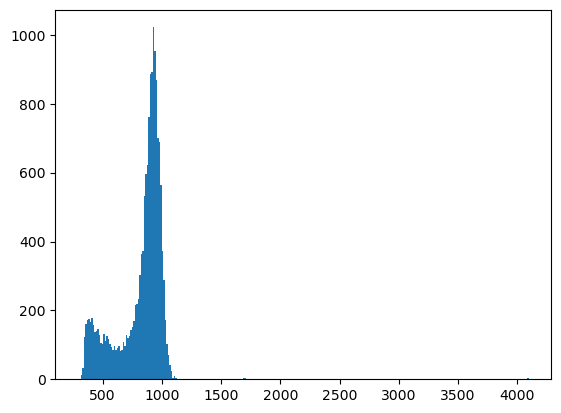

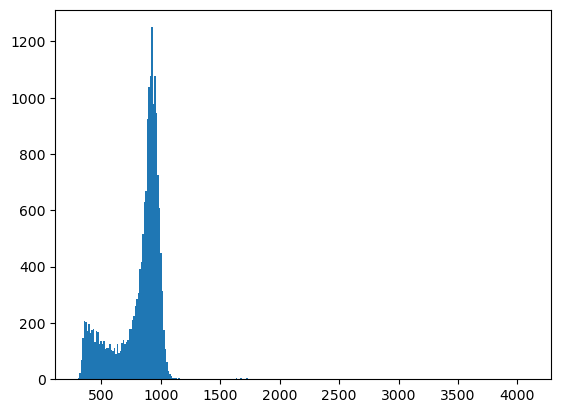

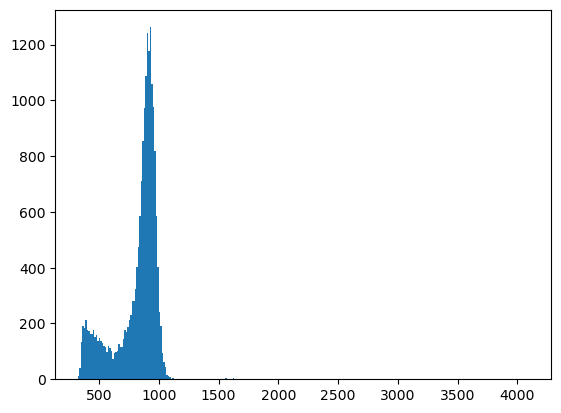

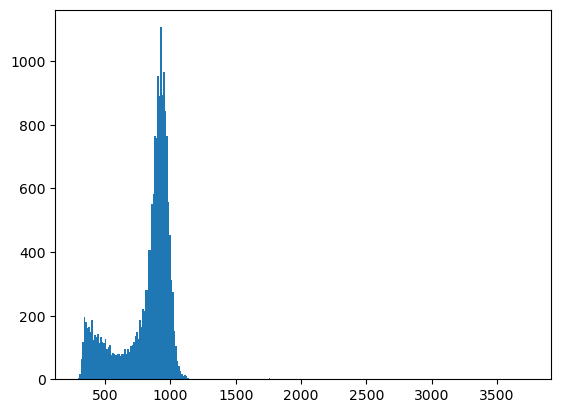

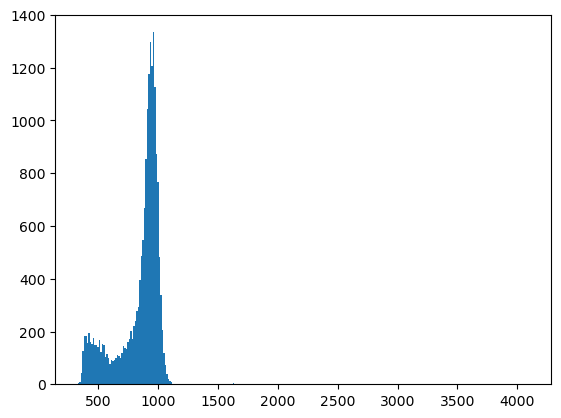

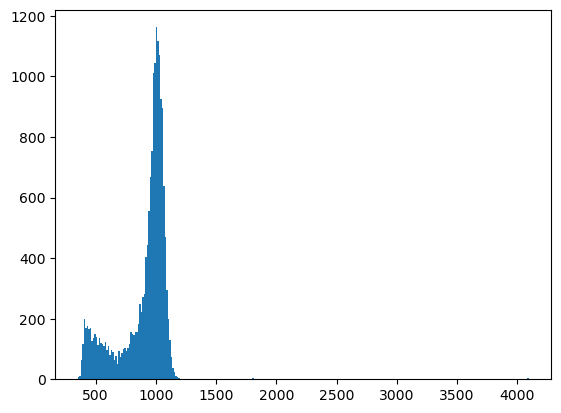

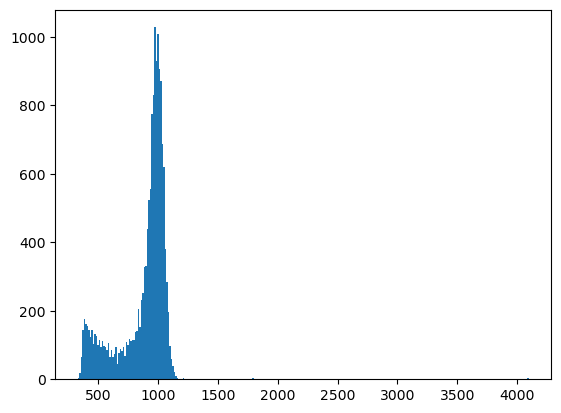

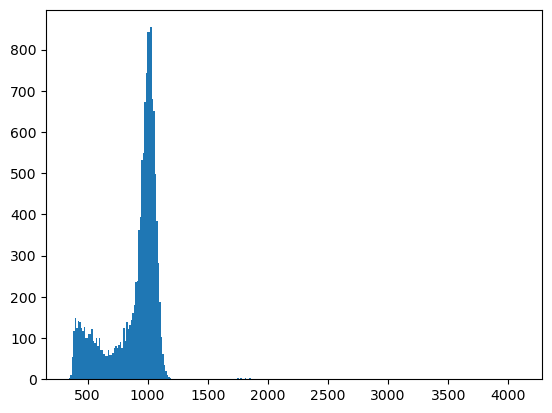

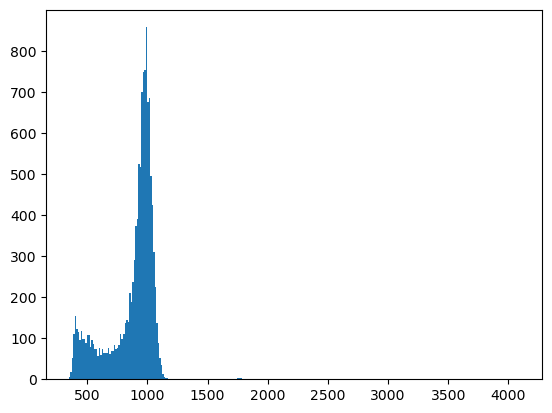

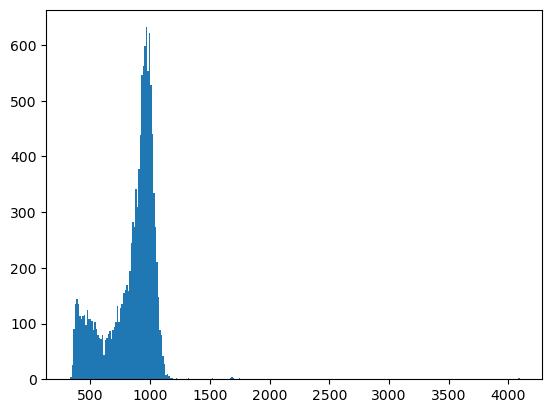

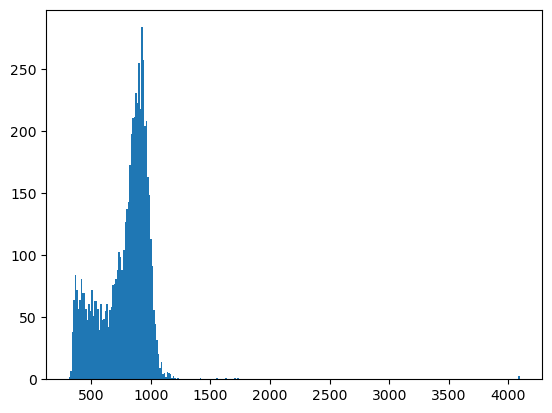

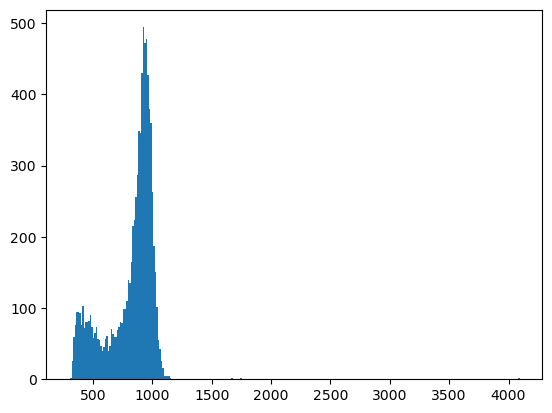

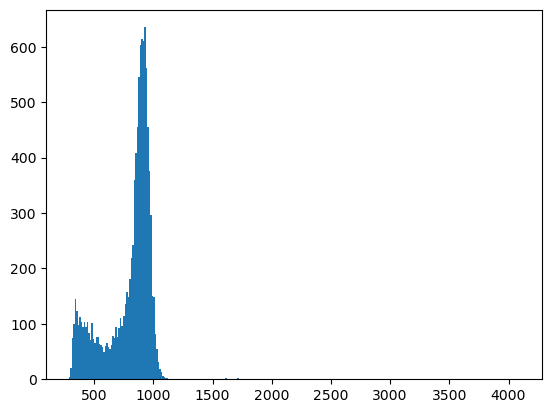

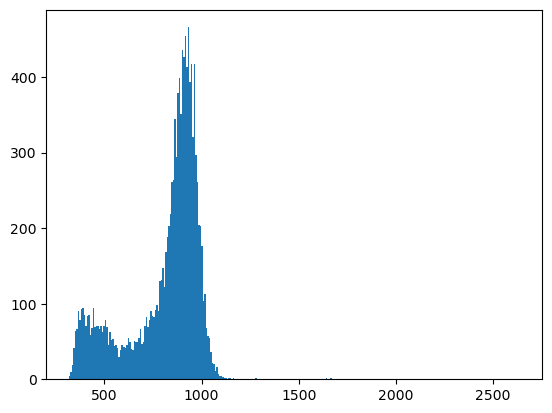

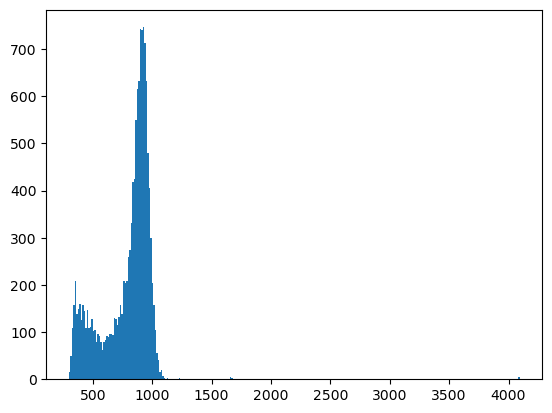

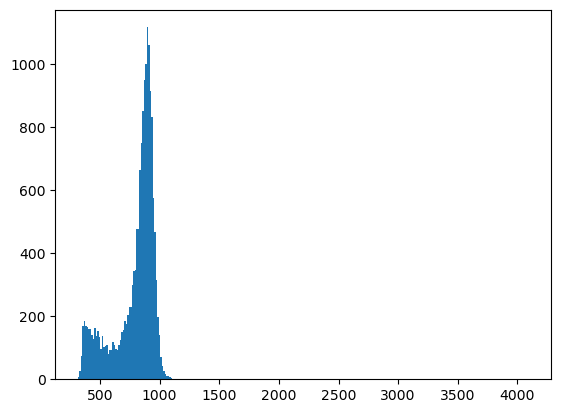

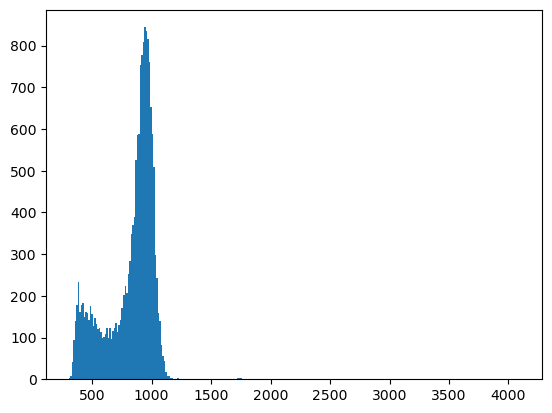

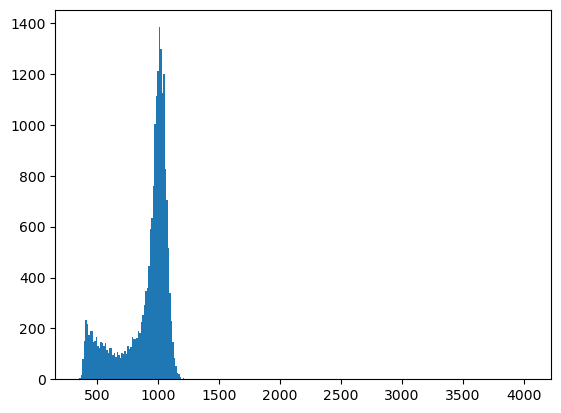

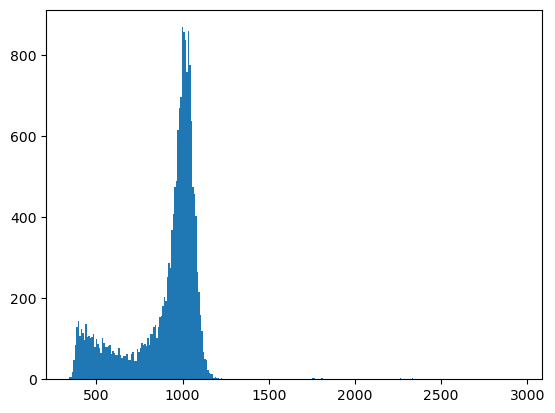

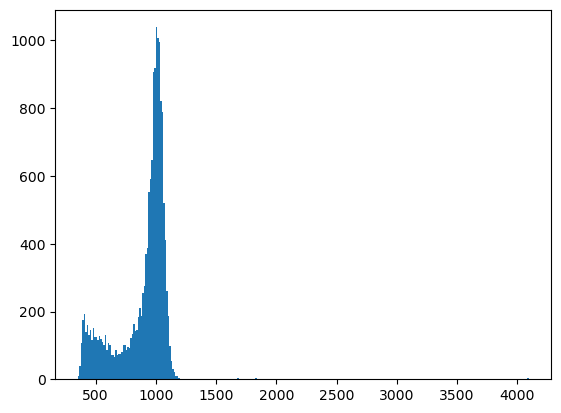

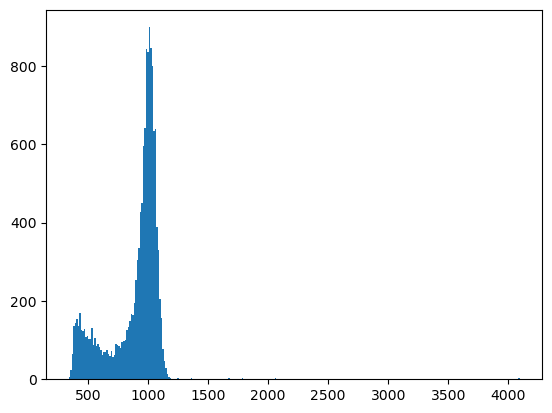

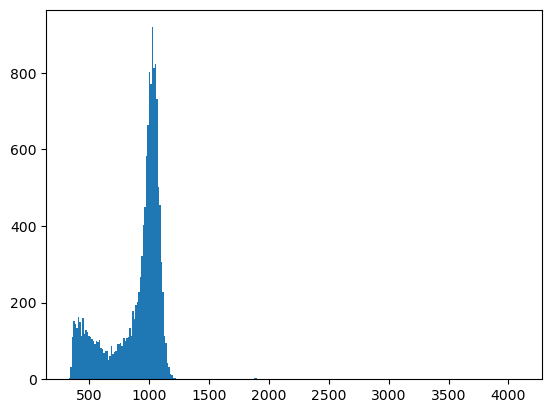

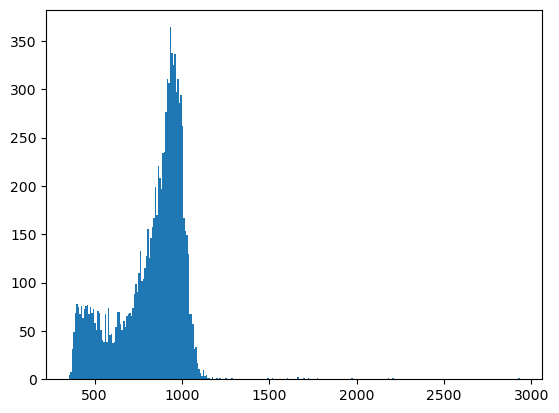

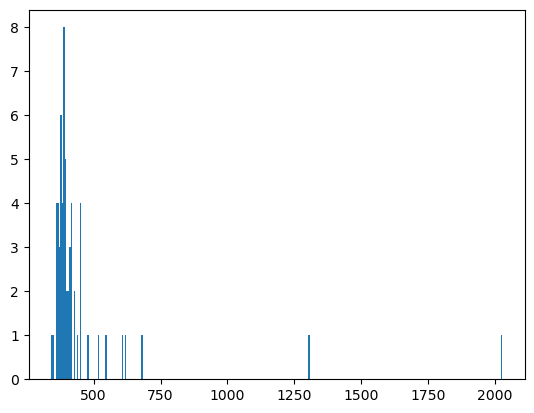

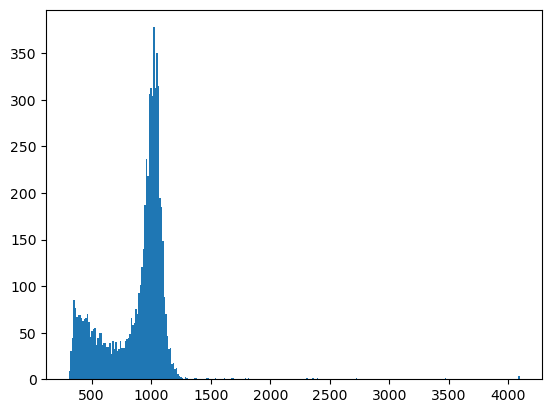

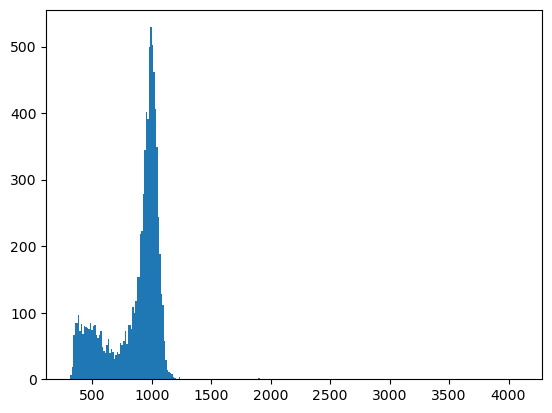

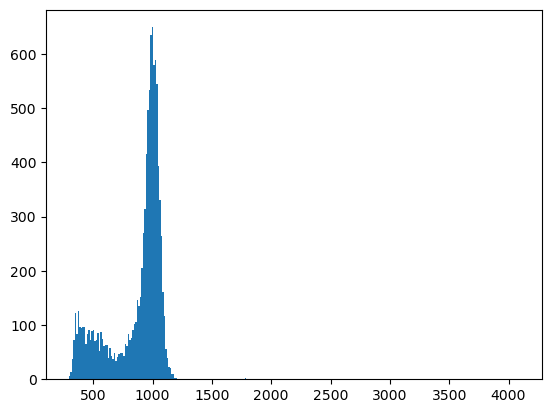

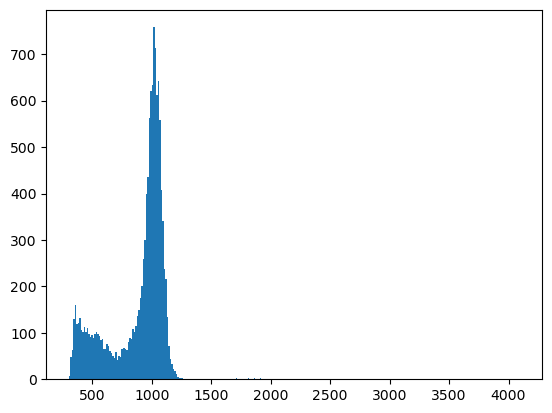

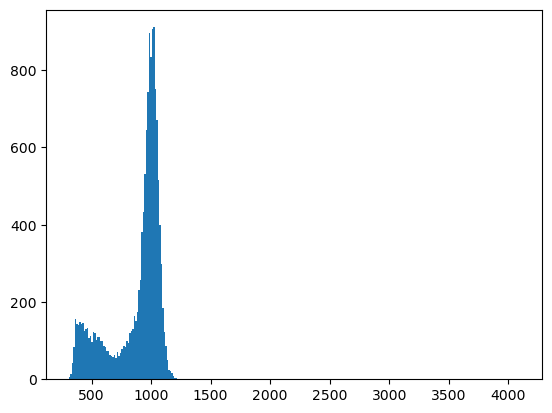

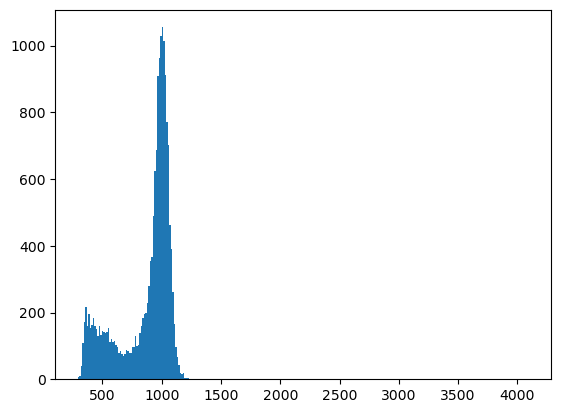

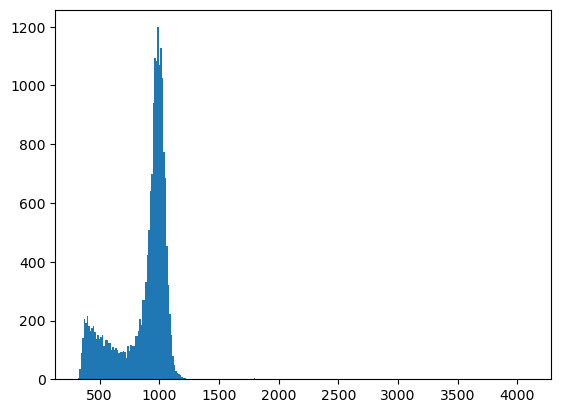

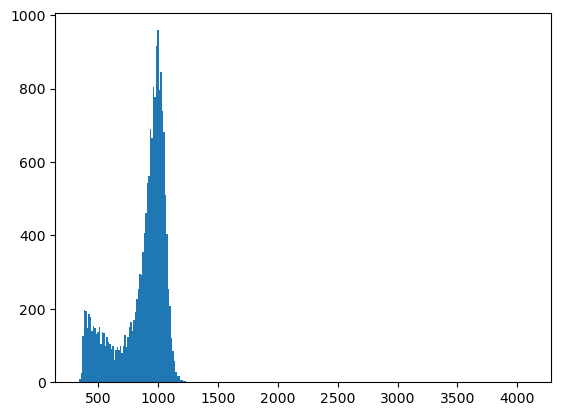

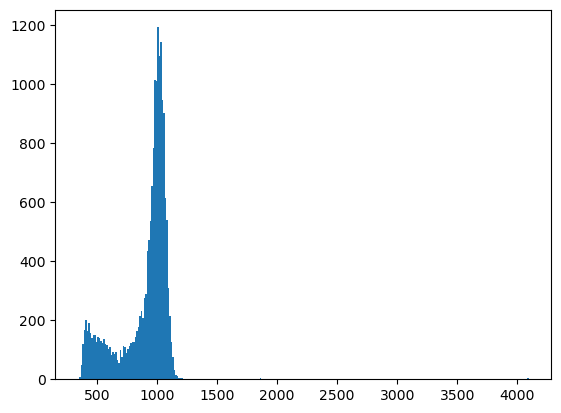

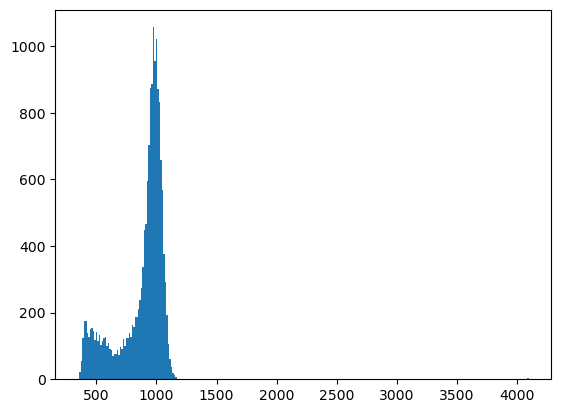

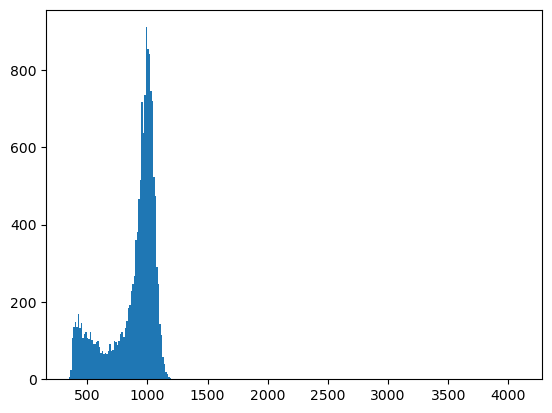

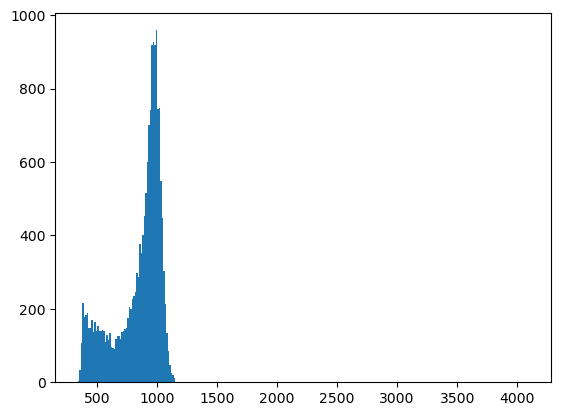

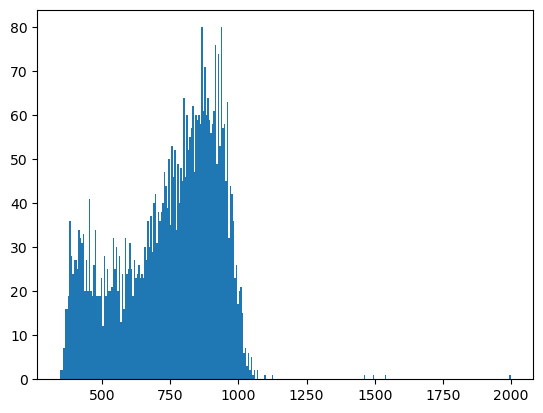

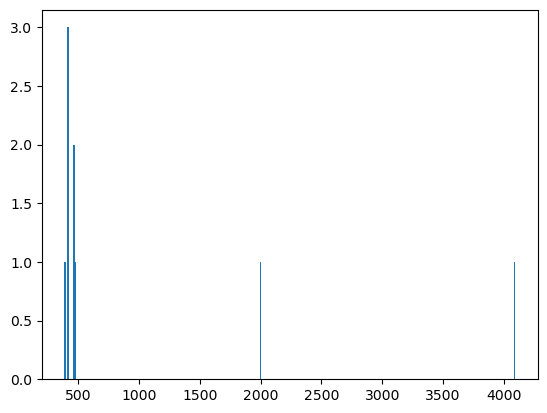

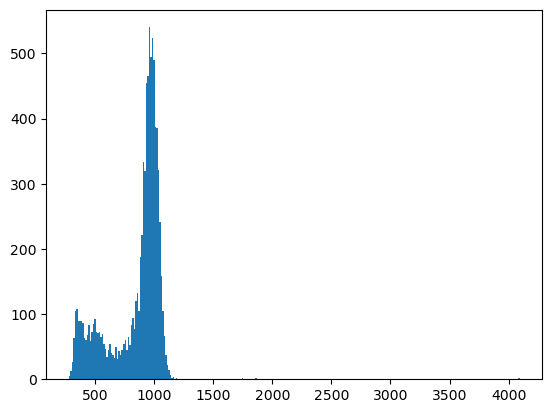

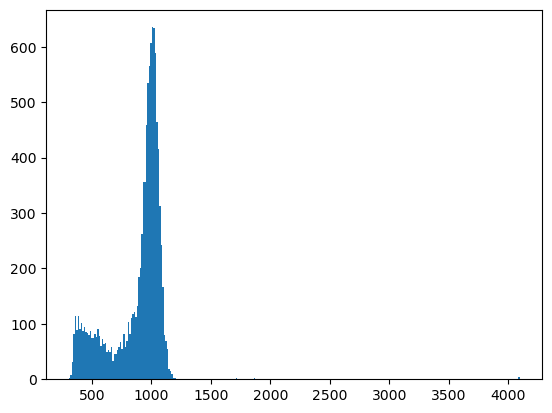

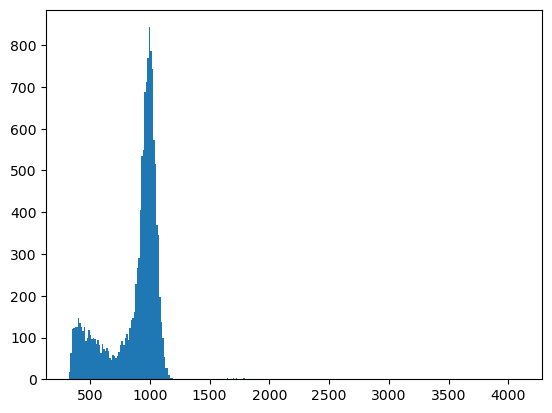

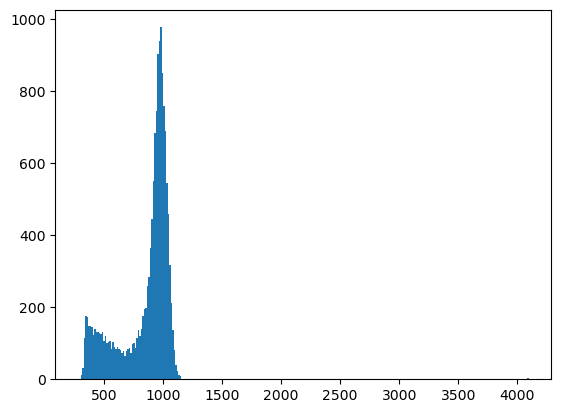

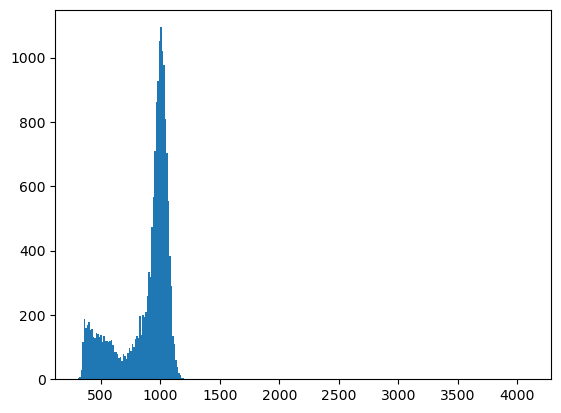

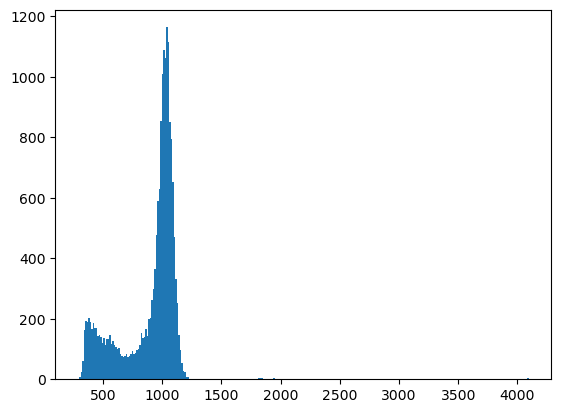

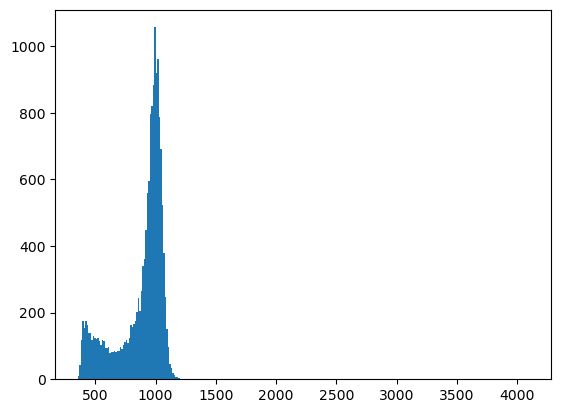

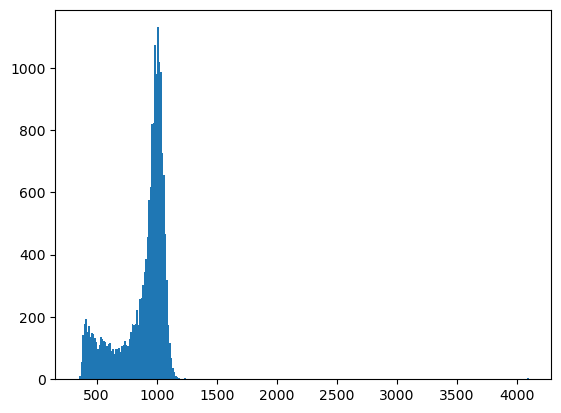

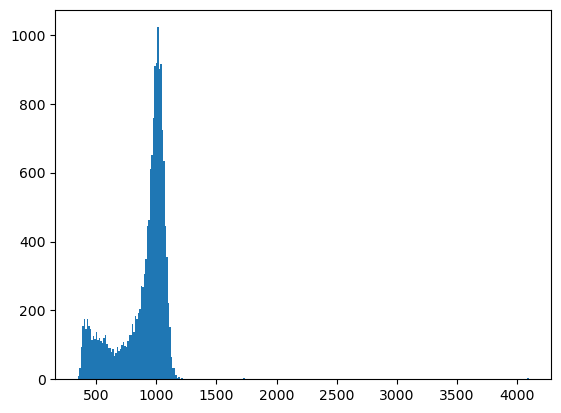

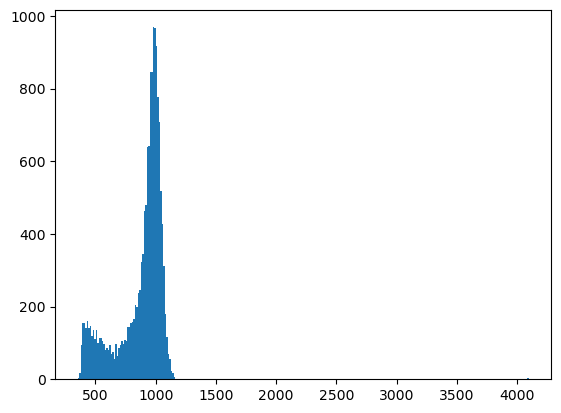

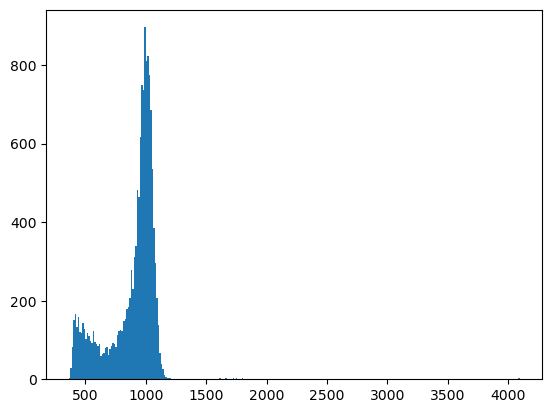

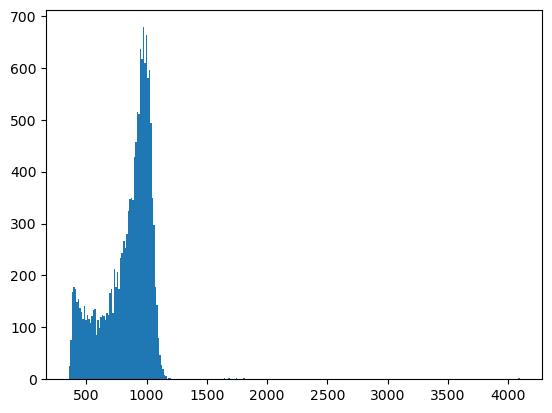

failed at pix: 158


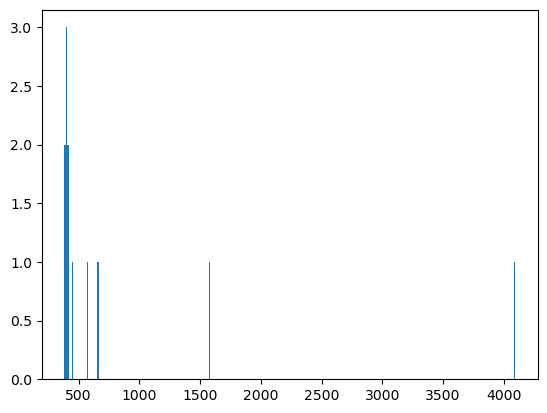

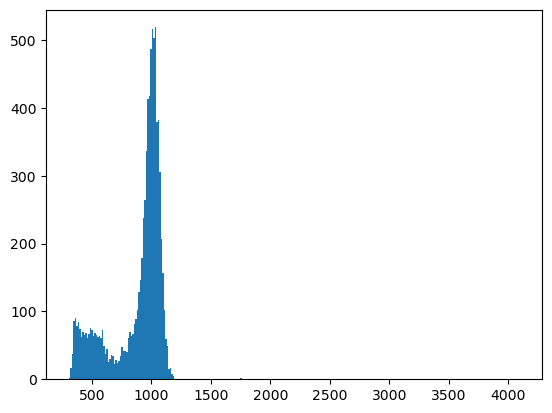

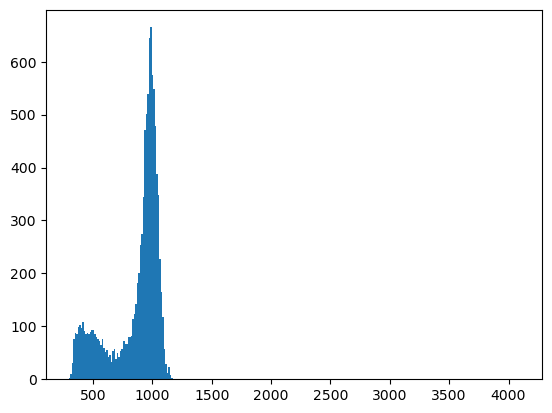

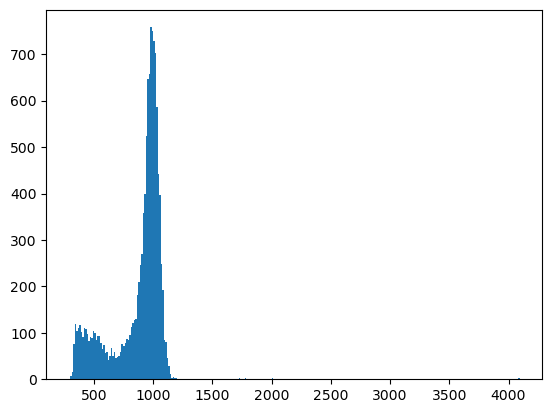

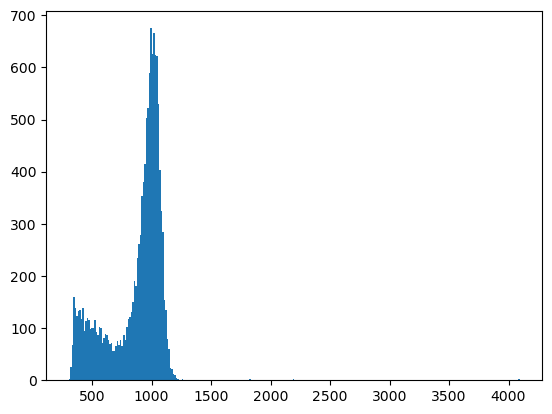

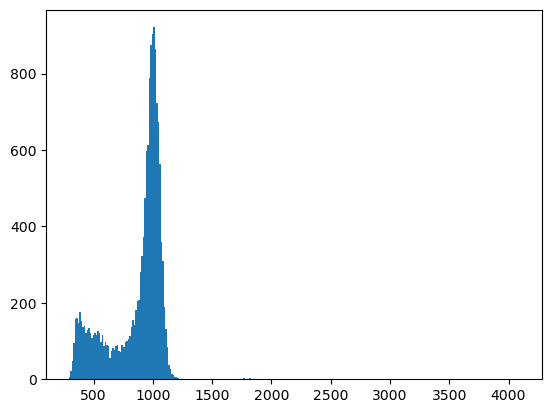

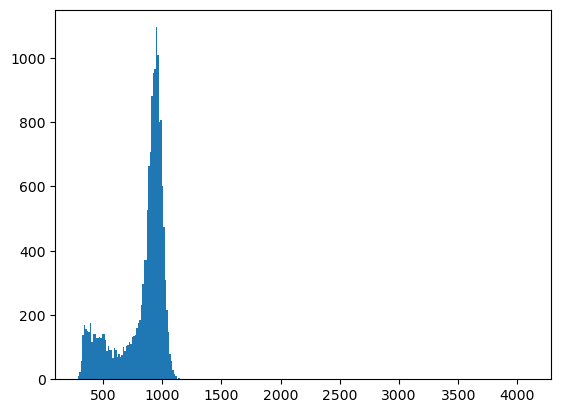

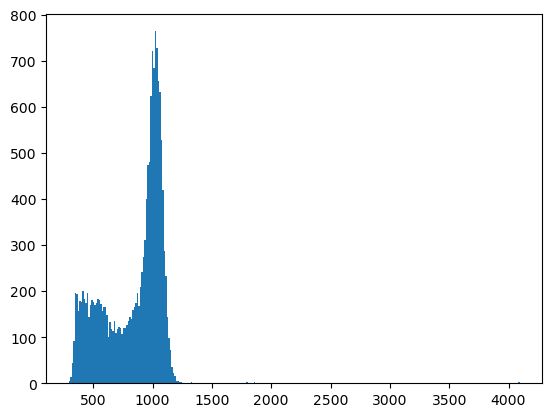

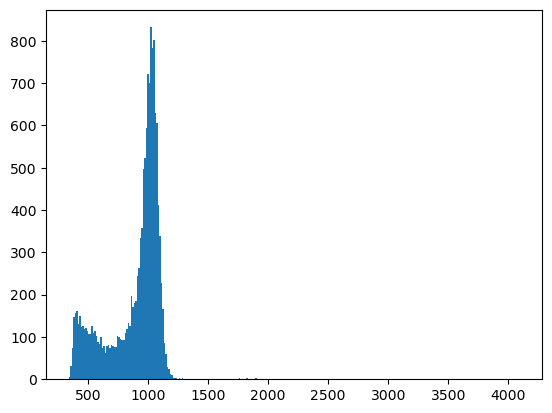

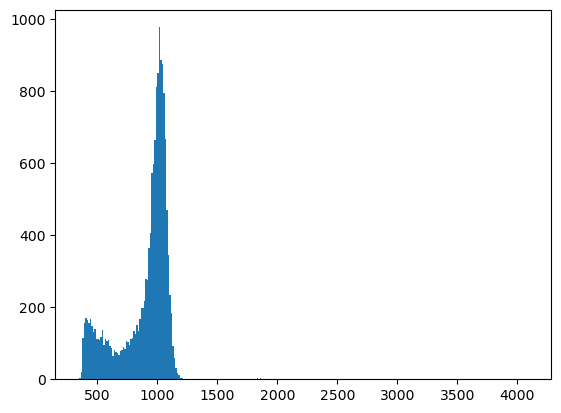

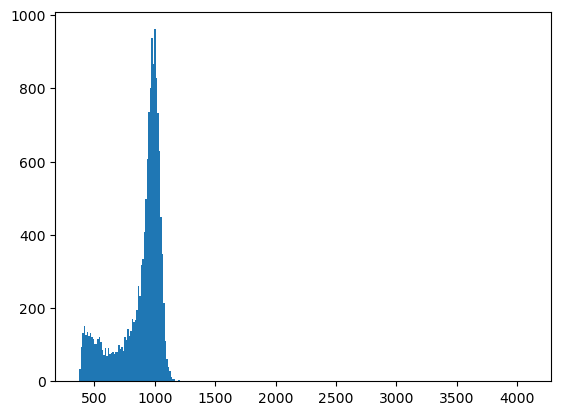

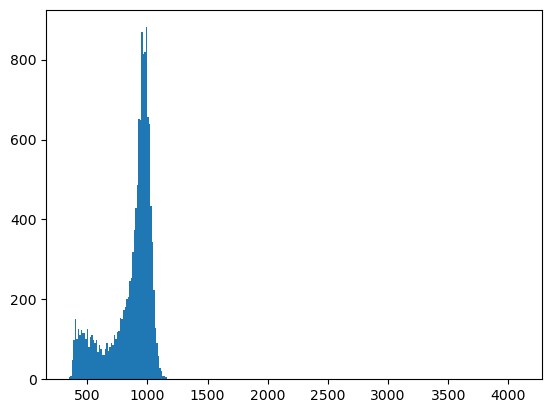

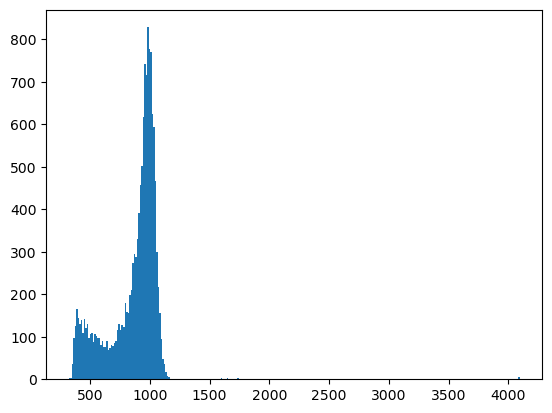

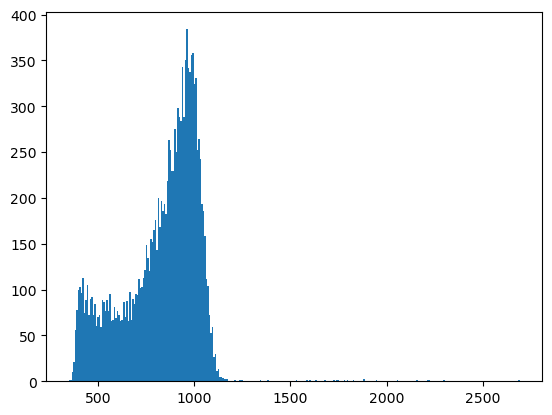

/tmp/ipykernel_99079/4287428696.py:20: RuntimeWarning: invalid value encountered in sqrt
  errors = np.sqrt(np.diag(pcov))


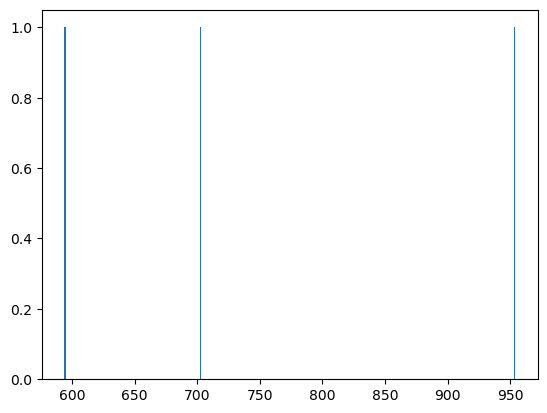

failed at pix: 175


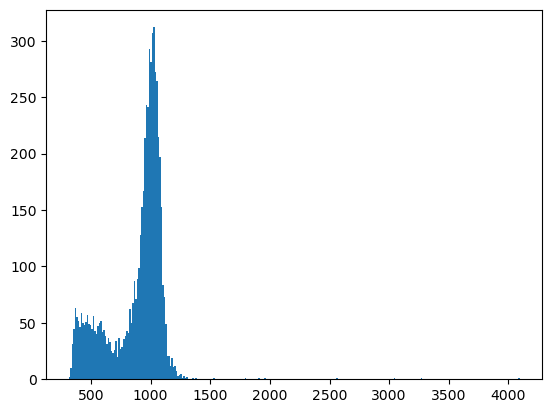

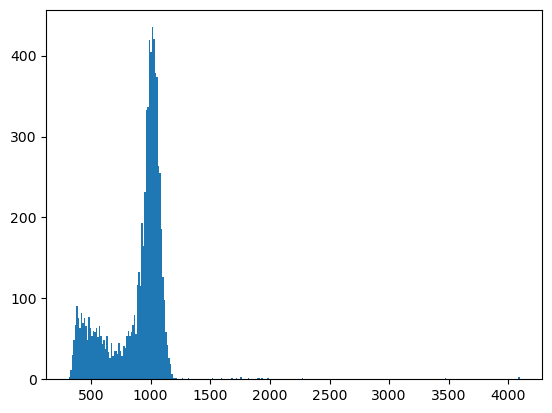

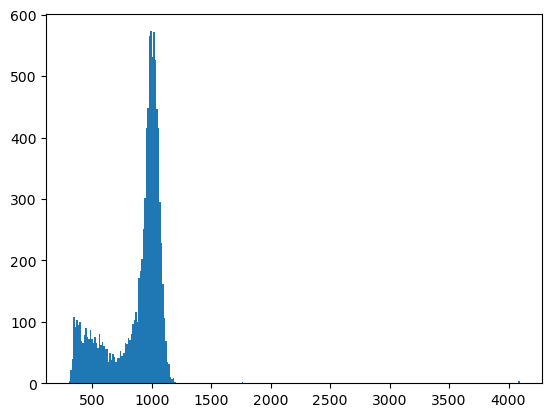

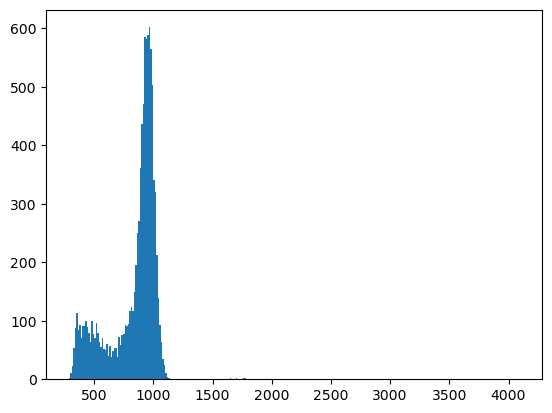

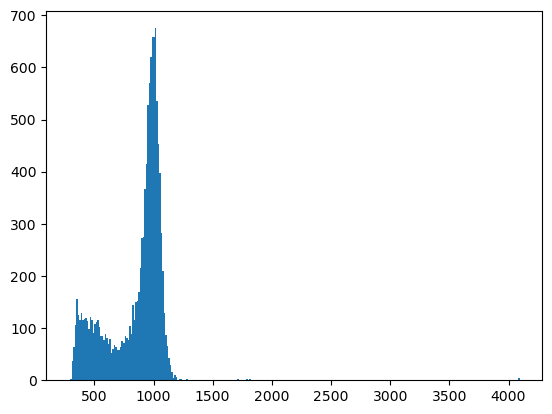

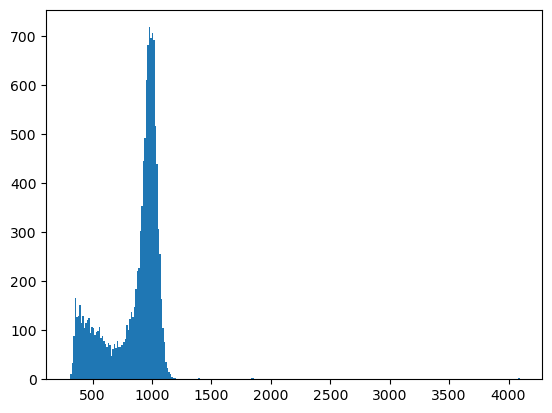

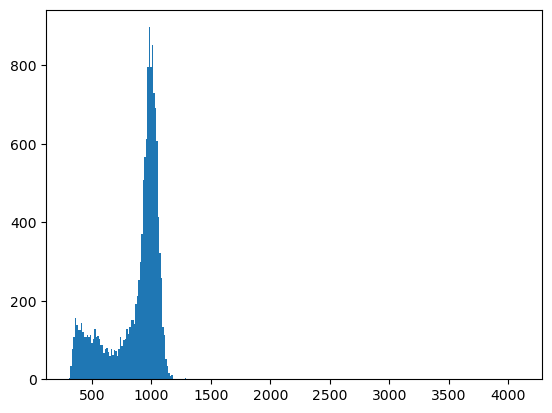

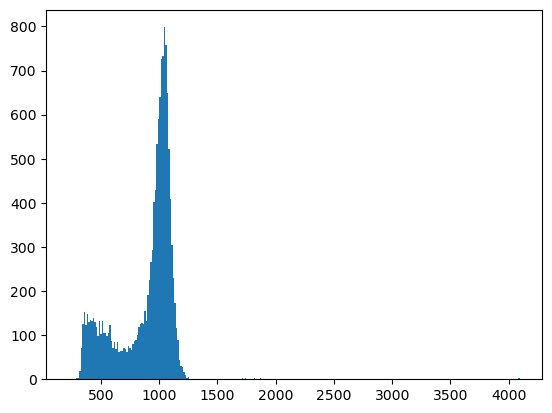

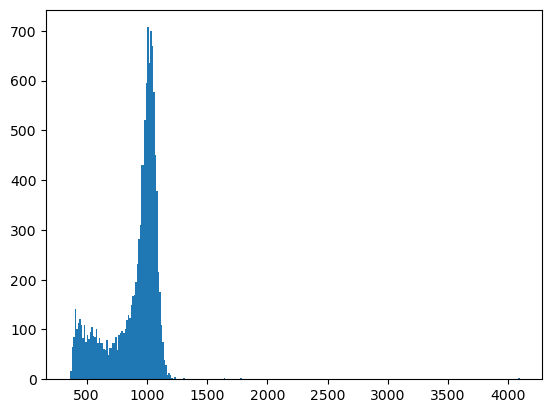

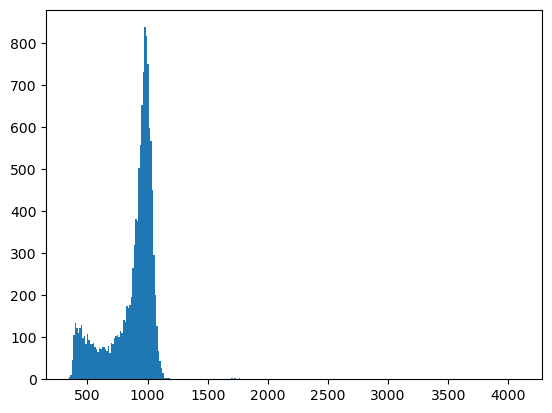

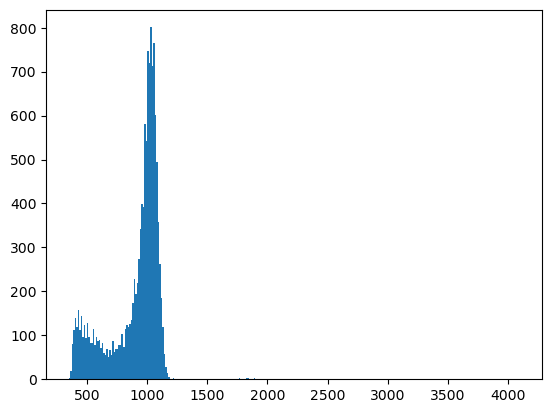

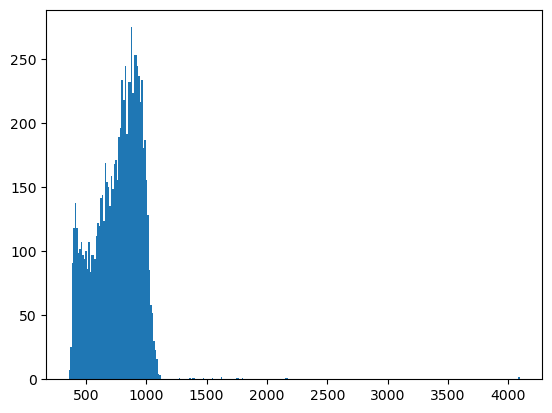

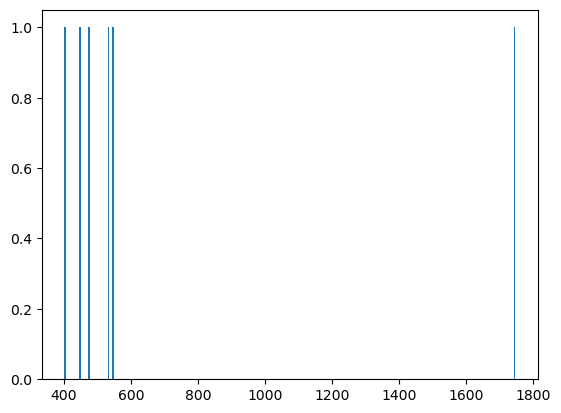

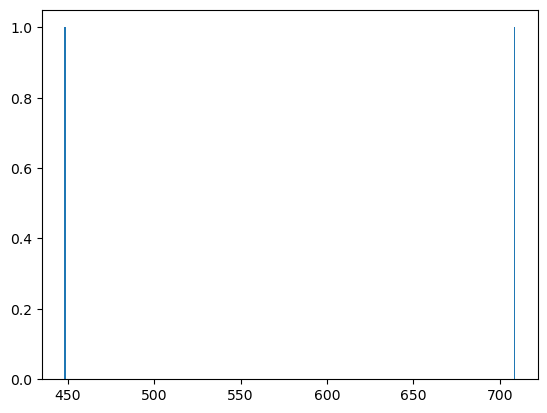

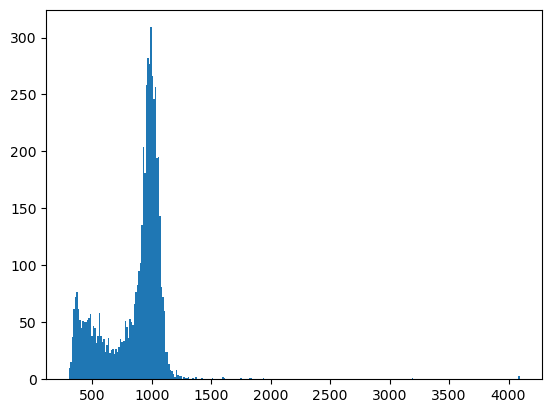

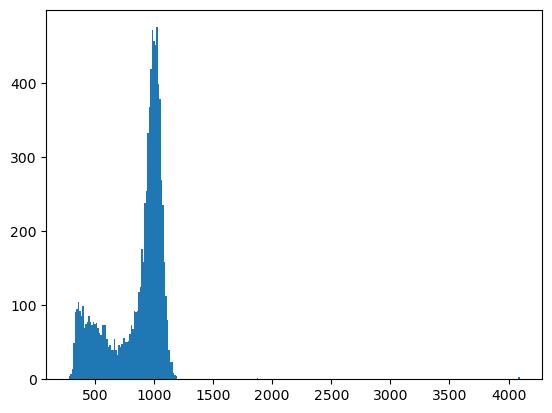

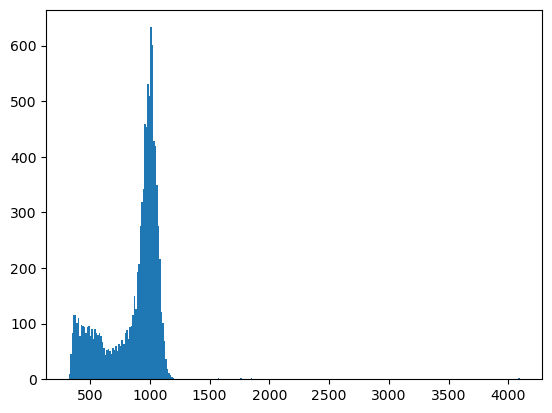

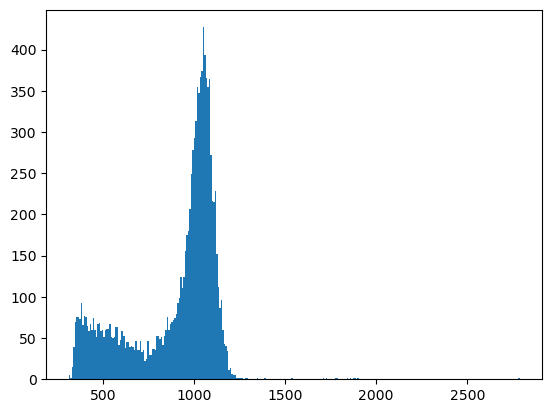

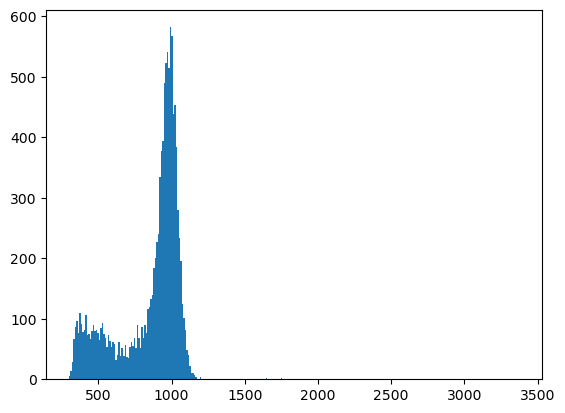

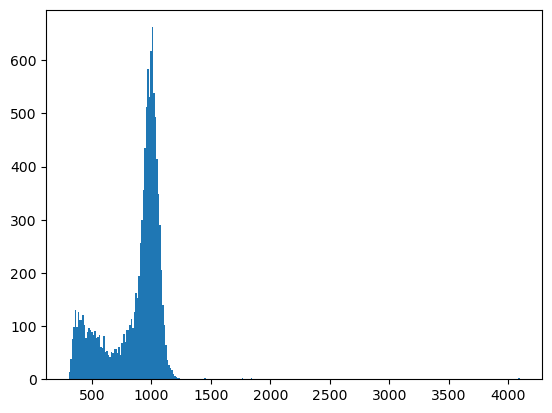

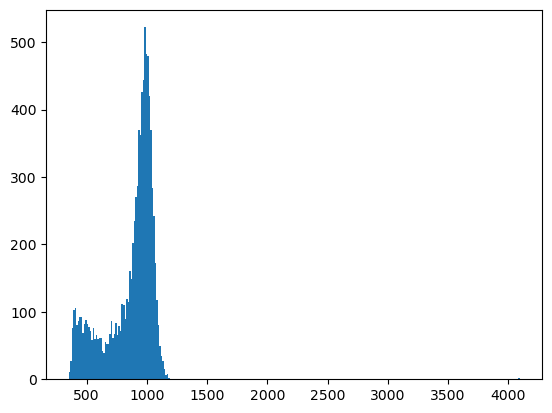

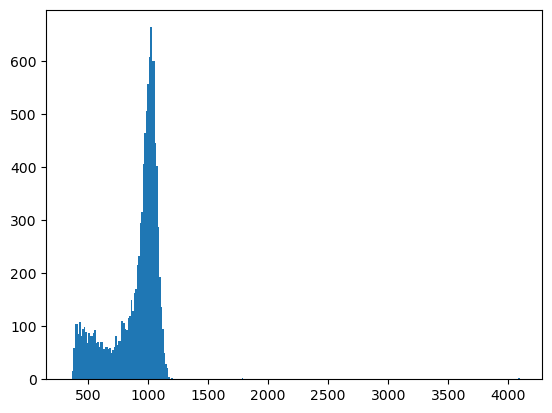

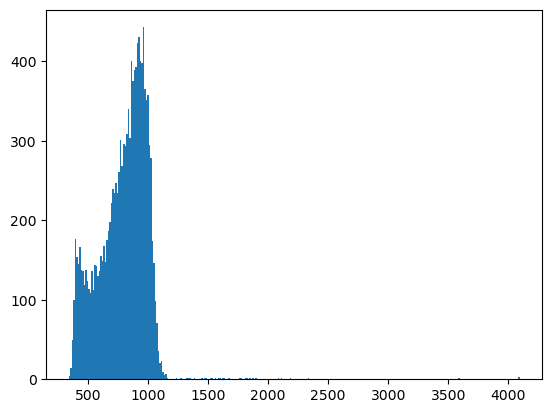

failed at pix: 205
failed at pix: 206


/tmp/ipykernel_99079/4287428696.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return amp * np.exp(-(x - mean)**2 / (2 * stdev**2))


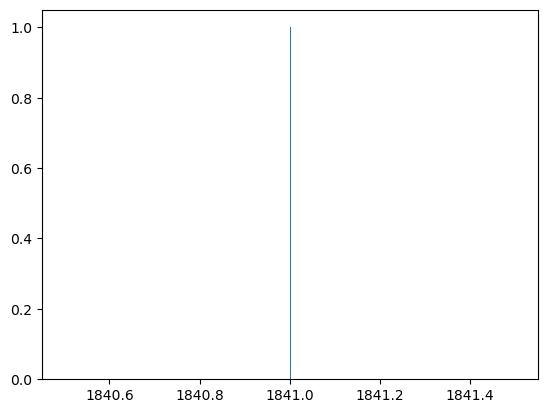

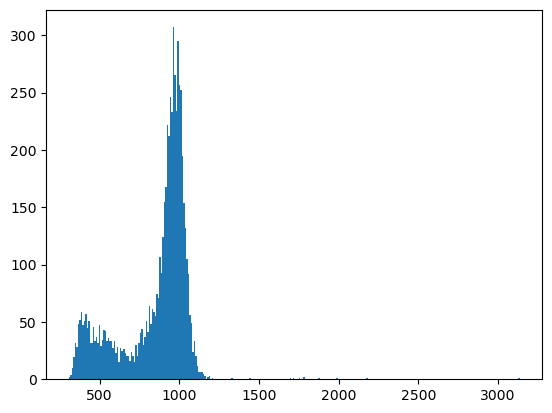

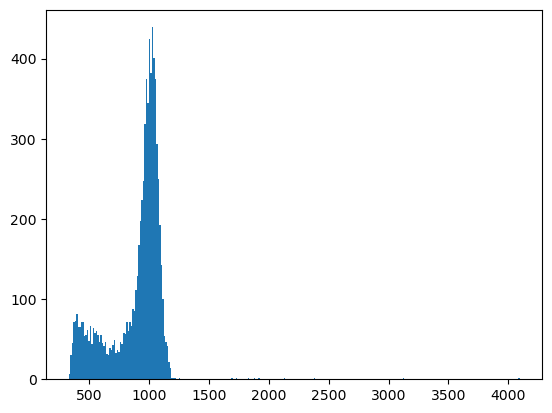

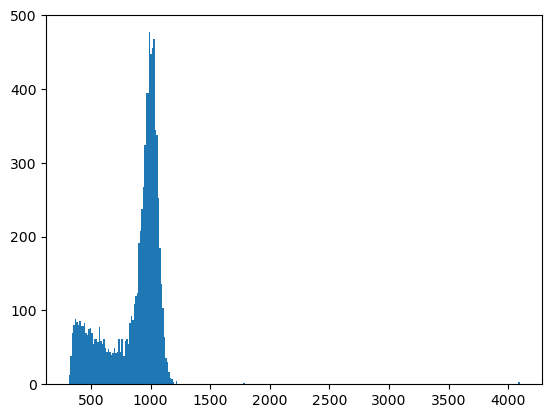

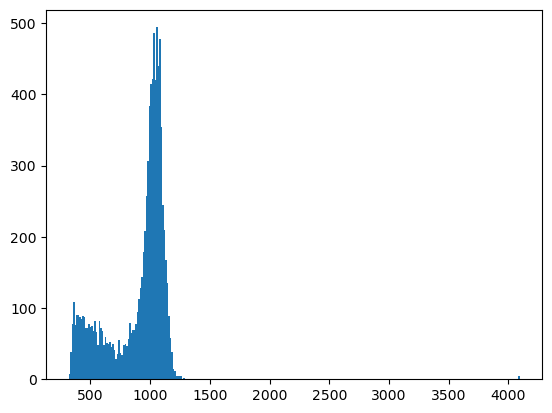

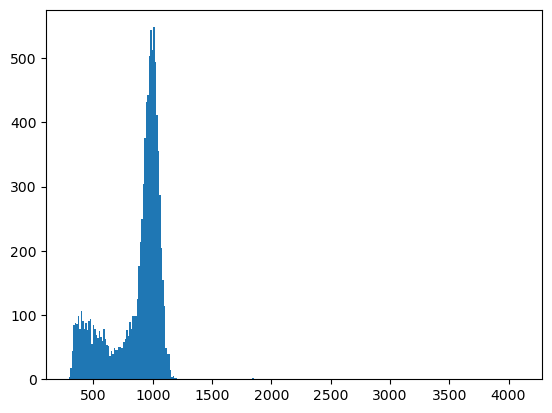

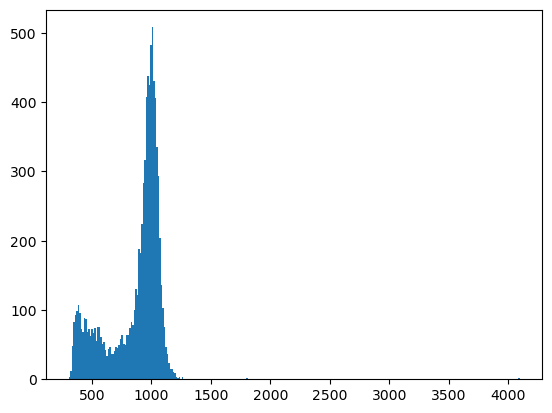

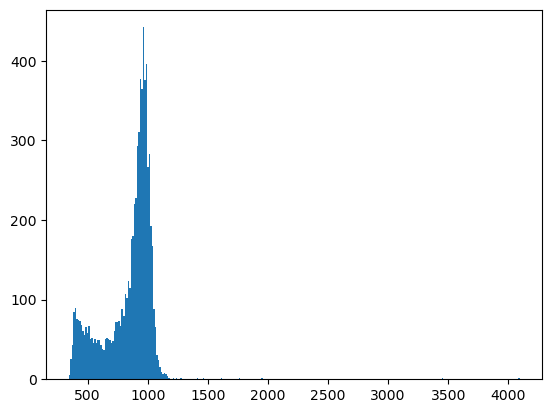

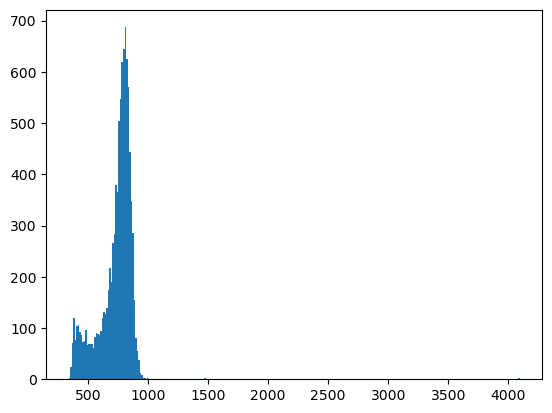

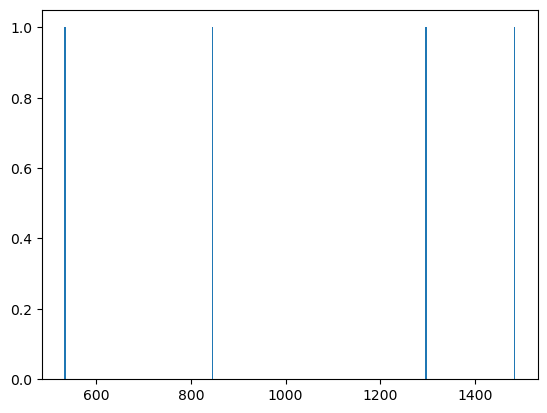

failed at pix: 221
failed at pix: 222


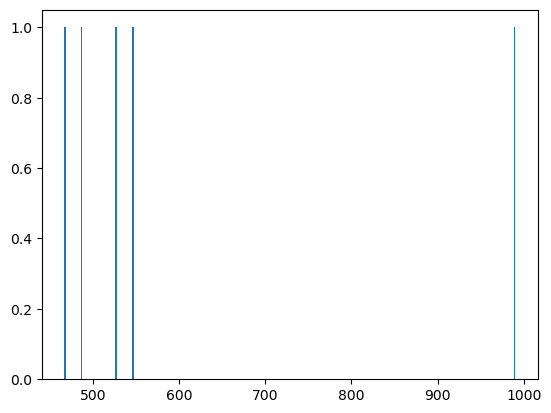

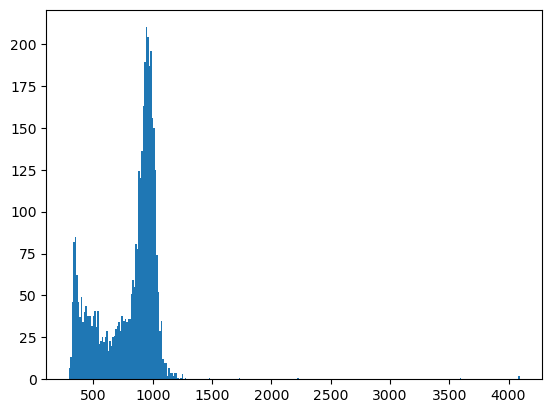

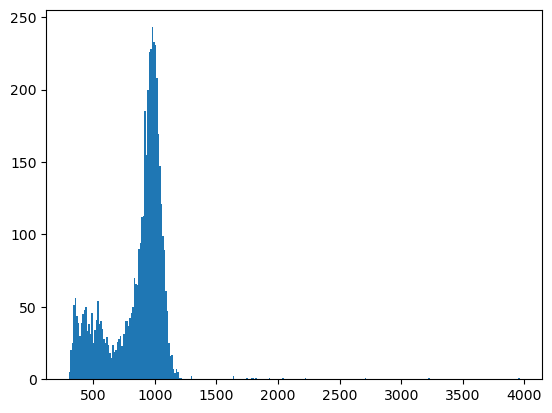

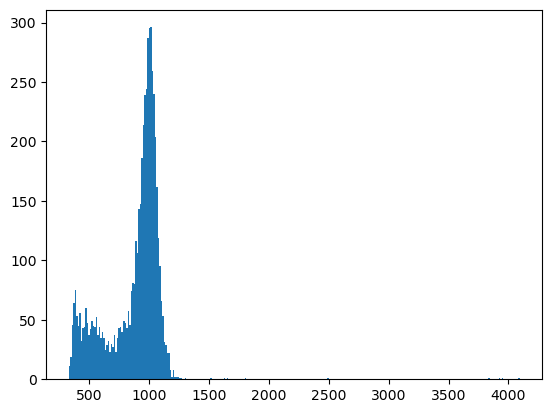

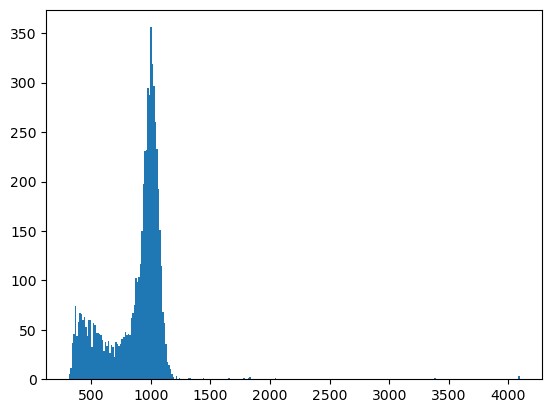

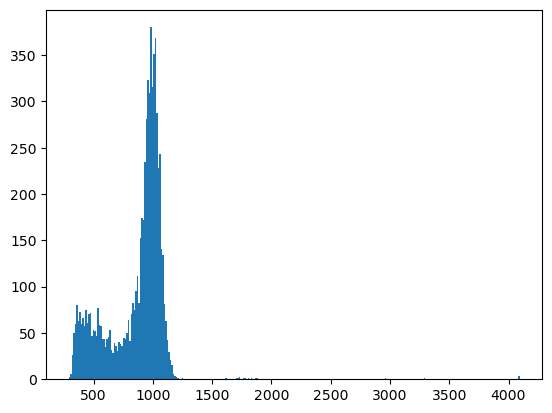

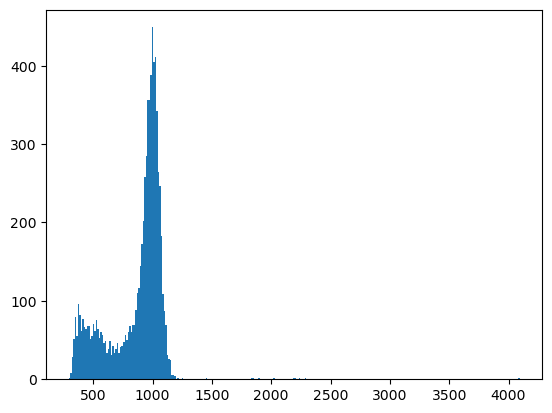

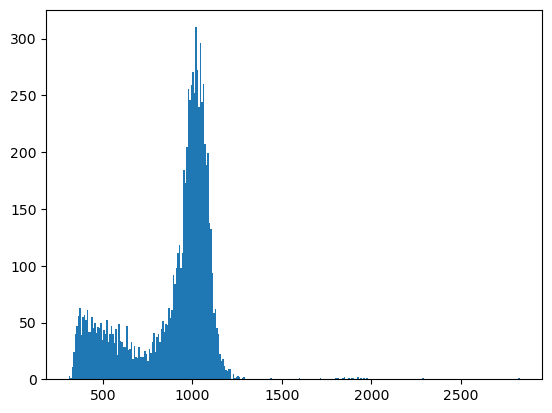

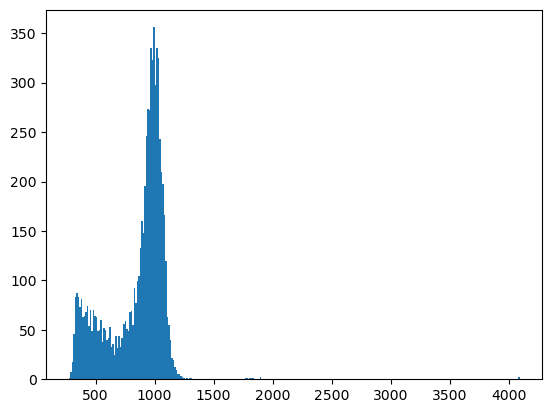

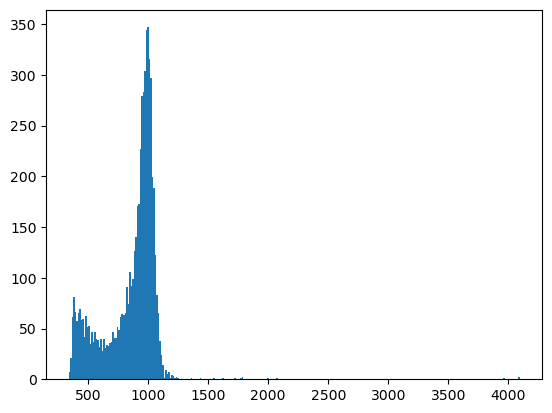

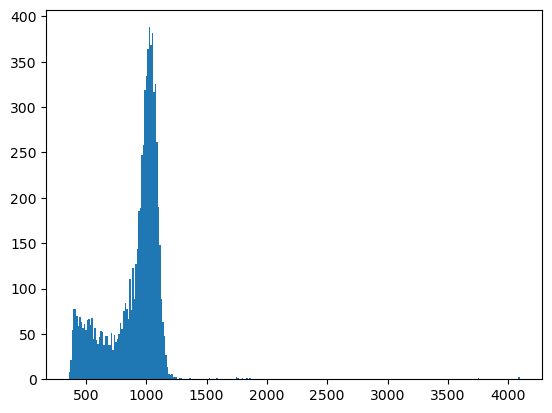

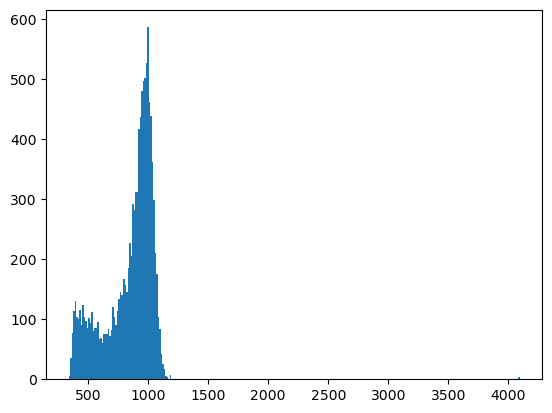

failed at pix: 236


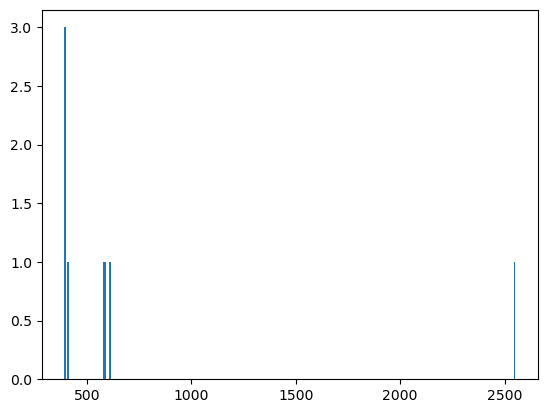

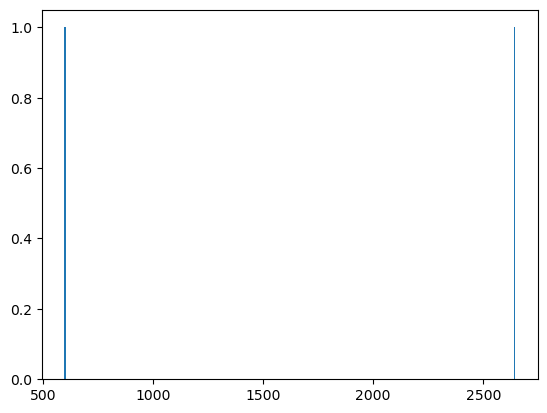

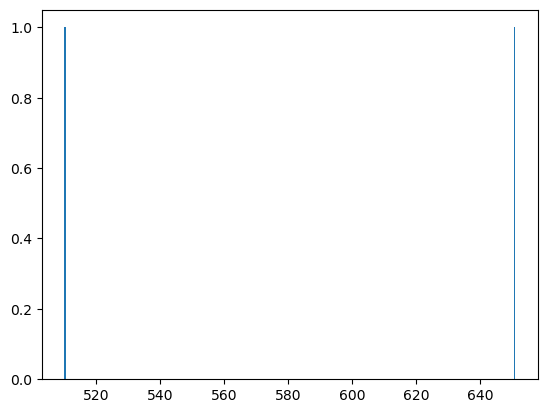

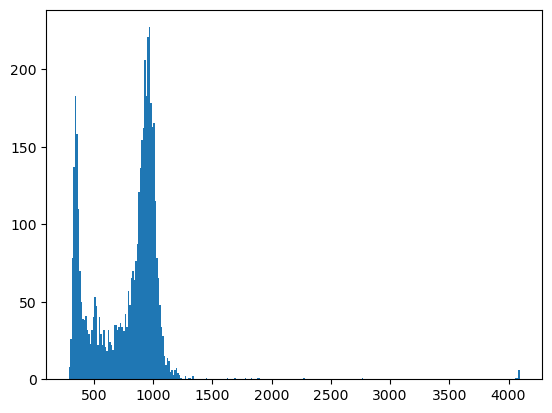

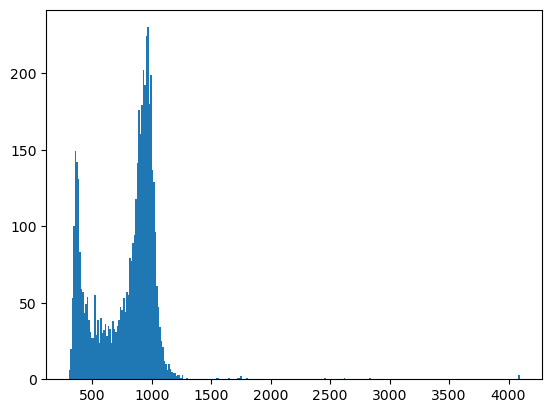

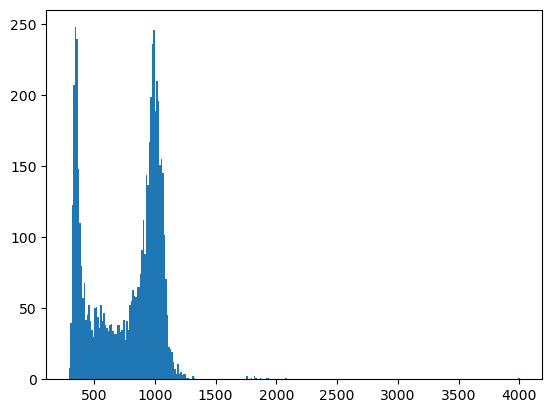

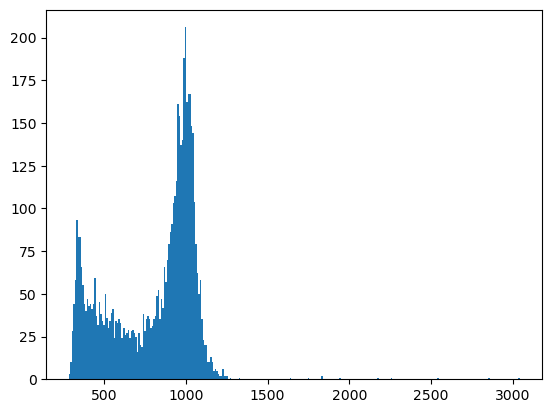

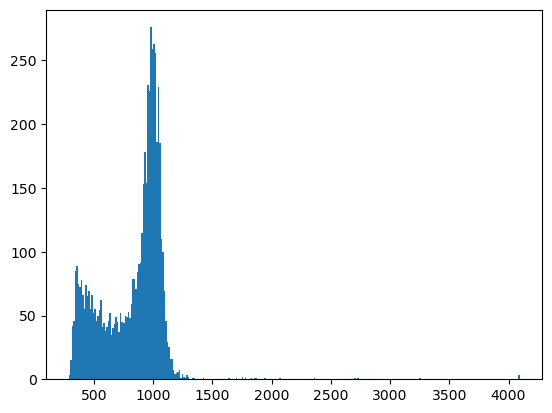

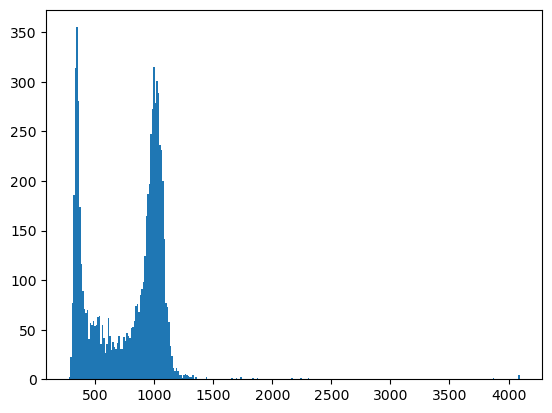

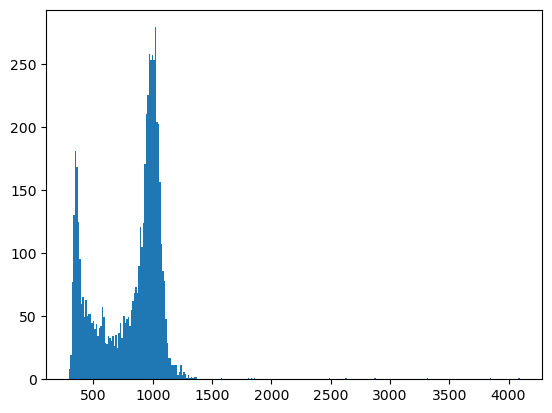

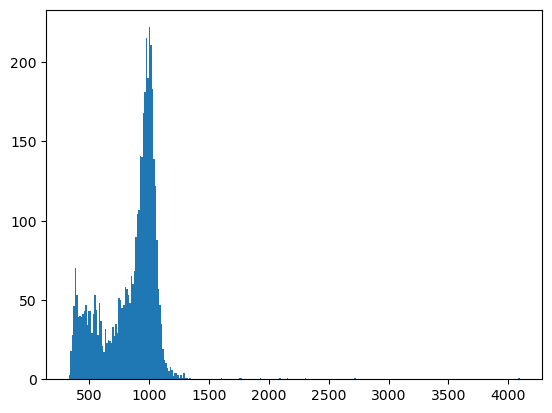

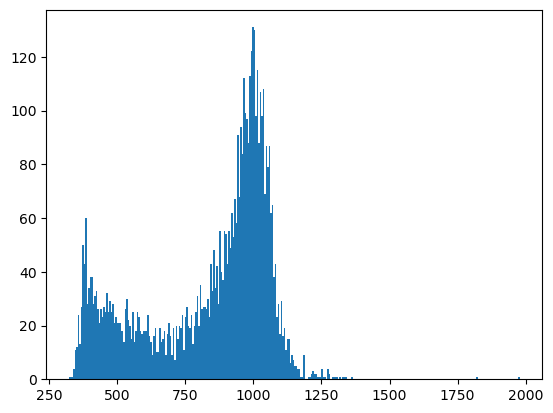

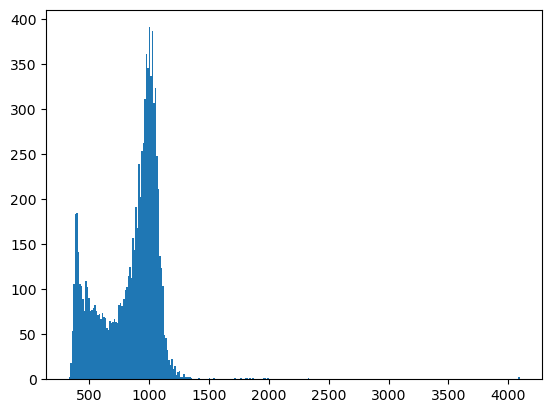

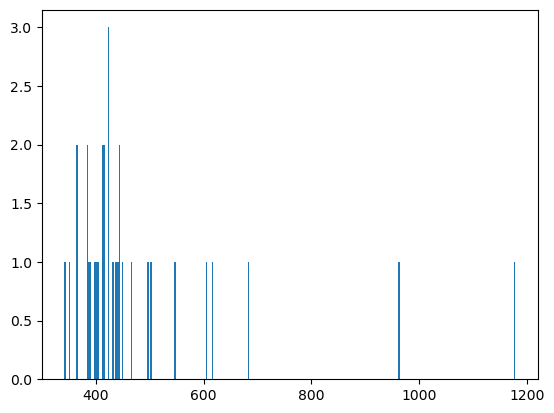

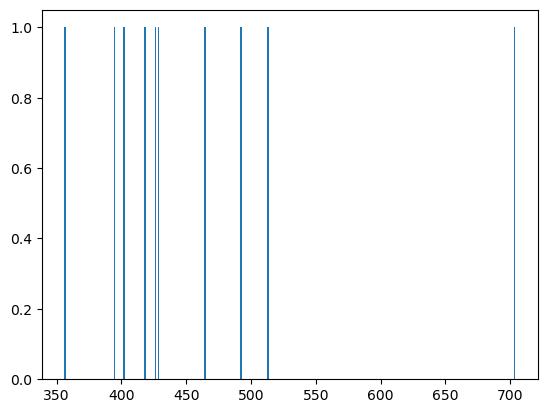

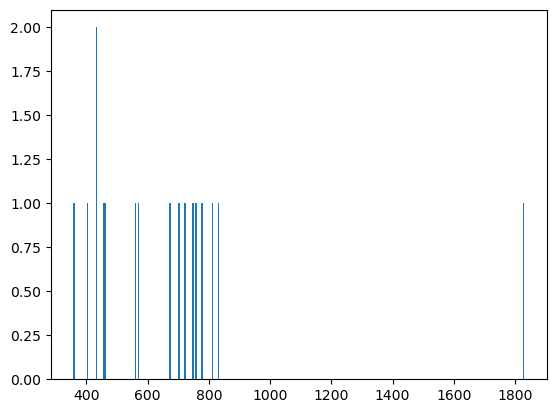

In [371]:
def gauss(x,amp,mean,stdev):
    return amp * np.exp(-(x - mean)**2 / (2 * stdev**2))
mean_data = []
deviation_data = []

for pix in unique_pixels:
    if pix != 0:
        try:
            data_grp = data1[data1['pixid'] == pix ]
            #print(data_grp)
            hist,bins = np.histogram(data_grp['pha'],bins = 300)
            #print(data_grp)
           
            fit_range = np.where((850 <=bins[:-1]) & (1000 >= bins[1:]))

            bin_centers = (bins[:-1] + bins[1:]) / 2
       
            p0 = [np.max(hist),np.mean(data_grp['pha']),np.std(data_grp['pha'])]
            params, pcov = curve_fit(gauss,bin_centers,hist,p0)
            errors = np.sqrt(np.diag(pcov))
            
            mean_data.append(params[1])
            deviation_data.append(params[2])
            plt.hist(data_grp['pha'],bins = 300)
            plt.show()
        except:
       
            print('failed at pix:', pix)
            mean_data.append(-99)
            deviation_data.append(-99)
            continue
    else:
        mean_data.append(-99)
        deviation_data.append(-99)
#    


In [372]:
len(mean_data),len(deviation_data)

(224, 224)

In [373]:
# Creating a list from the two arrays
combined_list = [(x, y) for x, y in zip(mean_data, deviation_data)]

print(combined_list)


[(-99, -99), (904.7411437426285, 77.9754443705784), (911.3053883391556, 75.31961206152818), (932.3535303469946, 74.53584752995314), (924.8723897060362, 71.91292163696575), (912.506492716675, 70.63430268134384), (922.4876732902941, 73.83510226358645), (941.4618063145401, 71.79955539930701), (987.648899710741, 73.0486675320319), (963.7172864506392, 78.7043678860232), (976.2606309850554, 80.5889249496486), (1001.7438563561944, 80.2298552036577), (992.2343033702583, 72.91012420459543), (985.0083255814828, 73.1816041735244), (916.2332832861995, 76.18403037458597), (889.8954841939799, 71.83910198378256), (904.3506541926346, 75.2756644464532), (897.2857840669926, 67.87032537868504), (901.1803412929165, 66.68815425703713), (913.6605598542642, 68.02809249585333), (928.1130847683385, 71.22896195508568), (968.6383545928978, 68.6776398597701), (982.3972250766967, 70.35242705708292), (974.476779667549, 69.54162560636507), (978.7157143985869, 70.18416270332621), (954.9512013709622, 69.90938022255207

In [383]:
filtered_list = [item for item in combined_list if item[1] >65 and item[0] >850 and item[1]<75 and item[0]<950]
# filtered_list = [item for item in filtered_list if item[1]>100]
print(filtered_list)

[(932.3535303469946, 74.53584752995314), (924.8723897060362, 71.91292163696575), (912.506492716675, 70.63430268134384), (922.4876732902941, 73.83510226358645), (941.4618063145401, 71.79955539930701), (889.8954841939799, 71.83910198378256), (897.2857840669926, 67.87032537868504), (901.1803412929165, 66.68815425703713), (913.6605598542642, 68.02809249585333), (928.1130847683385, 71.22896195508568), (872.4862139987138, 73.857088811658), (890.4381941186434, 73.67299053306132), (902.4148939228166, 69.86645570819918), (933.2017734015405, 69.55938808923541), (912.2757567649393, 68.16151403104189), (926.0872623337227, 65.89278206304067), (921.5765388411165, 70.14313707134063), (905.9081694800999, 73.57457431991517), (892.0461431806107, 70.84831738526528), (925.6797541168372, 68.99537900985175), (944.4473442017593, 67.10459474645528), (902.1339164633401, 67.4420684253776), (895.0968199920206, 72.07556239311921), (901.8830528344414, 72.42074005706262), (887.9646707588805, 67.22576165145064), (89

In [375]:
len(mean_data),len(deviation_data)

(224, 224)

In [376]:
#print(mean_data,deviation_data)

<function matplotlib.pyplot.show(close=None, block=None)>

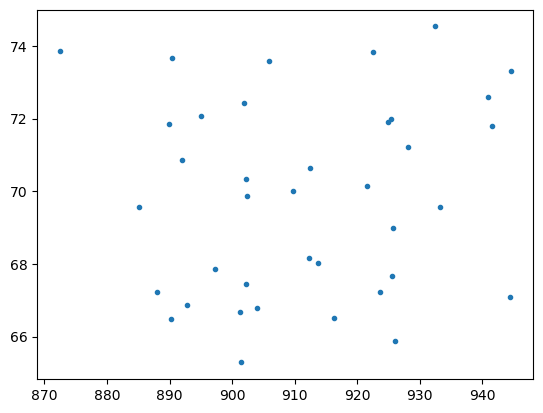

In [380]:
x = [item[0] for item in filtered_list]
y = [item[1] for item in filtered_list]
y = [y for y in y]
plt.plot(x,y, '.')
#plt.plot(0,0)
plt.show

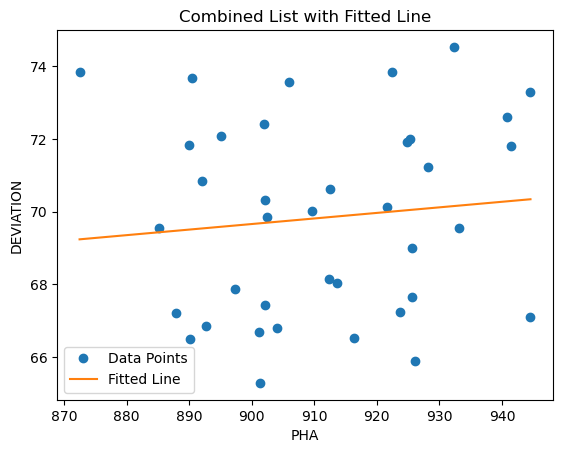

0.015306254647588453 55.88635880036508


In [381]:
# Perform linear regression
coefficients = np.polyfit(x, y, 1)
m, b = coefficients

# Generate line points
line_x = np.linspace(min(x), max(x), 100)
line_y = m * line_x + b

# Plotting the combined list
plt.plot(x, y, 'o', label='Data Points')

# Plotting the fitted line
plt.plot(line_x, line_y, label='Fitted Line')

# Adding labels and title
plt.xlabel('PHA')
plt.ylabel('DEVIATION')
plt.title('Combined List with Fitted Line')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()
print(m,b)

In [382]:
print('res = ', m*235,'%')

res =  3.5969698421832867 %
